In [2]:
#!pip install fedot

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.raiseExceptions = False

import fedot
from fedot.api.main import Fedot
from fedot.core.data.data import InputData
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import TsForecastingParams, Task, TaskTypesEnum
import inspect

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ts study 1.txt to ts study 1.txt


In [ ]:
ts_tabular =pd.read_csv('ts study 1.txt')
ts_real_temp = ts_tabular[ts_tabular['label']=='temp'].drop('label',axis=1)['value'].to_numpy()

In [4]:
def s1(n,noise = 3,sign=1):
    def f1(x):
        return 5*np.sin(x/20)+0.1*x-2*np.sqrt(x)
    trend = f1(np.array(range(n)))
    noise = np.random.normal(loc = 0, scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend' : trend*sign}
    return ans
def s2(length, periods = 10,noise = 0.3,sign=1 ):

    sinusoidal_data = np.linspace(-periods * np.pi, periods * np.pi, length)
    sinusoidal_data = np.sin(sinusoidal_data)
    cos_1_data = np.linspace(-periods * np.pi/2, periods/2 * np.pi/2, int(length/2))
    cos_1_data = np.cos(cos_1_data) 
    cos_2_data = np.linspace(periods/2 * np.pi/2, periods * np.pi/2, int(length/2))
    cos_2_data = np.cos(cos_2_data)   
    cosine_data = np.hstack((cos_1_data, cos_2_data))
    
    random_noise = np.random.normal(loc=0.0, scale=noise, size=length)
    synthetic_data = sinusoidal_data + cosine_data + random_noise
    ans = {'ts':synthetic_data*sign, 'trend': (sinusoidal_data + cosine_data)*sign}
    return ans
def s3(n,noise = 10,sign = 1):
    r = np.array(range(n))
    trend = (r-r/5*np.sin(r/2)+r/2*np.sin(r/20))/10
    noise = np.random.normal(loc=0,scale = noise,size = n)
    ans = {'ts':(trend+noise)*sign, 'trend': trend*sign}
    return ans
def s4(n,noise = 1,sign =1):
    array = np.array(range(n))
    trend = array/5+np.power(array,0.5)*np.sin(np.pi/12*array)
    noise = np.random.normal(loc = 0,scale = noise, size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign, 'trend' : trend*sign}
    return ans

def s5(n,noise = 1,sign=1):
    r= np.arange(n)
    trend = r*1
    noise = np.random.normal(loc=0,scale = noise,size = n)
    noise_cum = noise.cumsum()
    ts = trend+noise_cum
    ans = {'ts':ts*sign,'trend':trend*sign}
    return ans

def s6(n,noise = 1, sign =1):
    r = np.arange(n)
    trend = 2*np.sin(2*r)+np.cos(r)
    noise = np.random.normal(loc = 0,scale  = noise,size = n)
    ts = trend+noise
    ans = {'ts':ts,'trend':trend}
    return ans

In [63]:
horizon = 25
validation_blocks = 2
task = Task(TaskTypesEnum.ts_forecasting,  TsForecastingParams(forecast_length=horizon))
start = 0
end = 1000
series = 4

if series == 'traffic':
    init_series = ts_real_temp
    ts = init_series[start:end]
    trend = None
    ts_test = init_series[end:end+horizon]
    trend_test = None
    idx = np.array(range(len(np.array(ts))))

if series ==1:
    noise = 0.5
    init_series = s1(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)

    
if series ==2:
    noise = 0.5
    init_series = s2(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==3:
    noise = 0.5
    init_series = s3(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    
if series ==4:
    noise = 0.5
    init_series = s4(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
  
if series ==5:
    noise = 0.5
    init_series = s5(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

if series ==6:
    noise = 0.5
    init_series = s6(10000,noise= noise,sign =1)
    ts = init_series['ts'][start:end]
    trend = init_series['trend'][start:end]
    ts_test = init_series['ts'][end:end+horizon]
    trend_test = init_series['trend'][end:end+horizon]
    idx = np.array( range(len(np.array(ts))) )
    train_input = InputData(idx=idx,
                            features=ts,
                            target=ts,
                            task=task,
                            data_type=DataTypesEnum.ts)
    

train_data, test_data = train_test_data_setup(train_input, validation_blocks=2)

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting',
                  safe_mode = True,
                  task_params=task.task_params,
                  timeout=3,
                  n_jobs=1,
                  cv_folds=2, 
                  validation_blocks=2, 
                  preset='ts',
                  with_tuning = False,
                  max_depth = 5,
                  num_of_generations  =3 ,
                  logging_level = 10,
                 show_progress =True)

INFO:root:AssumptionsHandler - Initial pipeline fitting started


2022-11-22 13:16:22,661 - AssumptionsHandler - Initial pipeline fitting started


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 13:16:22,668 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 13:16:22,675 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Trying to fit secondary node with operation: ridge


2022-11-22 13:16:22,679 - SecondaryNode - Trying to fit secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 13:16:22,683 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: lagged


2022-11-22 13:16:22,687 - PrimaryNode - Trying to fit primary node with operation: lagged


DEBUG:root:PrimaryNode - Trying to fit primary node with operation: glm


2022-11-22 13:16:22,807 - PrimaryNode - Trying to fit primary node with operation: glm


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 13:16:22,937 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 13:16:22,943 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 13:16:22,948 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 13:16:22,951 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 13:16:22,954 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 13:16:22,960 - PrimaryNode - Predict in primary node by operation: glm


INFO:root:AssumptionsHandler - Initial pipeline was fitted successfully


2022-11-22 13:16:22,965 - AssumptionsHandler - Initial pipeline was fitted successfully


CRITICAL:root:ApiComposer - Initial pipeline was fitted in 0.3 sec.


2022-11-22 13:16:22,968 - ApiComposer - Initial pipeline was fitted in 0.3 sec.


CRITICAL:root:ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['pca', 'sparse_lagged', 'lagged', 'arima', 'locf', 'scaling', 'stl_arima', 'linear', 'fast_ica', 'normalization', 'dtreg', 'glm', 'diff_filter', 'adareg', 'smoothing', 'ar', 'ridge', 'polyfit', 'ets', 'sgdr', 'lasso', 'cut', 'gaussian_filter', 'ts_naive_average']


2022-11-22 13:16:22,989 - ApiComposer - AutoML configured. Parameters tuning: False Time limit: 3 min Set of candidate models: ['pca', 'sparse_lagged', 'lagged', 'arima', 'locf', 'scaling', 'stl_arima', 'linear', 'fast_ica', 'normalization', 'dtreg', 'glm', 'diff_filter', 'adareg', 'smoothing', 'ar', 'ridge', 'polyfit', 'ets', 'sgdr', 'lasso', 'cut', 'gaussian_filter', 'ts_naive_average']


CRITICAL:root:ApiComposer - Pipeline composition started.


2022-11-22 13:16:23,010 - ApiComposer - Pipeline composition started.


INFO:root:DataSourceSplitter - K-folds cross validation is applied.


2022-11-22 13:16:23,013 - DataSourceSplitter - K-folds cross validation is applied.


Generations:  33%|███▎      | 1/3 [00:00<?, ?gen/s]INFO:root:MultiprocessingDispatcher - Number of used CPU's: 1


2022-11-22 13:16:23,020 - MultiprocessingDispatcher - Number of used CPU's: 1


INFO:root:EvoGraphOptimizer - Generation num: 1


2022-11-22 13:16:23,778 - EvoGraphOptimizer - Generation num: 1


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.4317972764174685, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 13:16:23,786 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.4317972764174685, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 13:16:23,791 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.0 min


2022-11-22 13:16:23,795 - EvoGraphOptimizer - spent time: 0.0 min


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 1


2022-11-22 13:16:25,546 - MultiprocessingDispatcher - Number of used CPU's: 1


INFO:root:EvoGraphOptimizer - Generation num: 2


2022-11-22 13:17:14,758 - EvoGraphOptimizer - Generation num: 2


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.4239013506210805, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 13:17:14,771 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.4239013506210805, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 13:17:14,777 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 0.9 min


2022-11-22 13:17:14,781 - EvoGraphOptimizer - spent time: 0.9 min


INFO:root:EvoGraphOptimizer - Next population size: 34; max graph depth: 5


2022-11-22 13:17:14,785 - EvoGraphOptimizer - Next population size: 34; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 1


2022-11-22 13:17:15,724 - MultiprocessingDispatcher - Number of used CPU's: 1


2022-11-22 13:17:22,634 - PipelineObjectiveEvaluate - Continuing after pipeline fit error <Can't merge different data types> for graph: ((/n_lagged_{'window_size': 10};)/n_ridge_{};;(/n_lagged_{'window_size': 10};;/n_smoothing_{};;/n_sparse_lagged_{'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False};)/n_glm_{'family': 'gaussian', 'link': 'log'};)/n_ridge_{}


2022-11-22 13:17:22,914 - PipelineObjectiveEvaluate - Continuing after pipeline fit error <Can't merge different data types> for graph: ((/n_lagged_{'window_size': 10};)/n_ridge_{};;(/n_lagged_{'window_size': 10};;/n_smoothing_{};;/n_sparse_lagged_{'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False};)/n_glm_{'family': 'gaussian', 'link': 'log'};)/n_ridge_{}


INFO:root:EvoGraphOptimizer - Generation num: 3


2022-11-22 13:17:54,123 - EvoGraphOptimizer - Generation num: 3


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.4239013506210805, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 13:17:54,133 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.4239013506210805, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 1 iterations


2022-11-22 13:17:54,138 - EvoGraphOptimizer - no improvements for 1 iterations


INFO:root:EvoGraphOptimizer - spent time: 1.5 min


2022-11-22 13:17:54,148 - EvoGraphOptimizer - spent time: 1.5 min


INFO:root:EvoGraphOptimizer - Next population size: 55; max graph depth: 5


2022-11-22 13:17:54,154 - EvoGraphOptimizer - Next population size: 55; max graph depth: 5


INFO:root:MultiprocessingDispatcher - Number of used CPU's: 1


2022-11-22 13:17:55,480 - MultiprocessingDispatcher - Number of used CPU's: 1


INFO:root:EvoGraphOptimizer - Generation num: 4


2022-11-22 13:18:24,571 - EvoGraphOptimizer - Generation num: 4


INFO:root:EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.423763845819239, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


2022-11-22 13:18:24,580 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness: [{<bound method QualityMetric.get_value of <class 'fedot.core.composer.metrics.RMSE'>>: 1.423763845819239, <ComplexityMetricsEnum.node_num: 'node_number'>: 0.4}]


INFO:root:EvoGraphOptimizer - no improvements for 0 iterations


2022-11-22 13:18:24,587 - EvoGraphOptimizer - no improvements for 0 iterations


INFO:root:EvoGraphOptimizer - spent time: 2.0 min


2022-11-22 13:18:24,591 - EvoGraphOptimizer - spent time: 2.0 min


CRITICAL:root:GroupedCondition - Optimisation stopped: Max number of generations reached


2022-11-22 13:18:24,594 - GroupedCondition - Optimisation stopped: Max number of generations reached


Generations:  33%|███▎      | 1/3 [02:01<?, ?gen/s]
INFO:root:OptimisationTimer - Composition time: 2.026 min


2022-11-22 13:18:24,599 - OptimisationTimer - Composition time: 2.026 min


INFO:root:GPComposer - GP composition finished


2022-11-22 13:18:24,605 - GPComposer - GP composition finished


CRITICAL:root:ApiComposer - Model generation finished


2022-11-22 13:18:24,859 - ApiComposer - Model generation finished


CRITICAL:root:FEDOT logger - Final pipeline was fitted


2022-11-22 13:18:25,066 - FEDOT logger - Final pipeline was fitted


CRITICAL:root:FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}


2022-11-22 13:18:25,079 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 4, 'nodes': [ridge, glm, ridge, lagged]}


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 13:18:25,087 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 13:18:25,097 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Obtain prediction in secondary node with operation: ridge


2022-11-22 13:18:25,109 - SecondaryNode - Obtain prediction in secondary node with operation: ridge


DEBUG:root:SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


2022-11-22 13:18:25,123 - SecondaryNode - Fit all parent nodes in secondary node with operation: ridge


DEBUG:root:PrimaryNode - Predict in primary node by operation: lagged


2022-11-22 13:18:25,136 - PrimaryNode - Predict in primary node by operation: lagged


DEBUG:root:PrimaryNode - Predict in primary node by operation: glm


2022-11-22 13:18:25,147 - PrimaryNode - Predict in primary node by operation: glm


2022-11-22 13:18:25,202 - OperationTypesRepository - Operation lagged not found in the repository


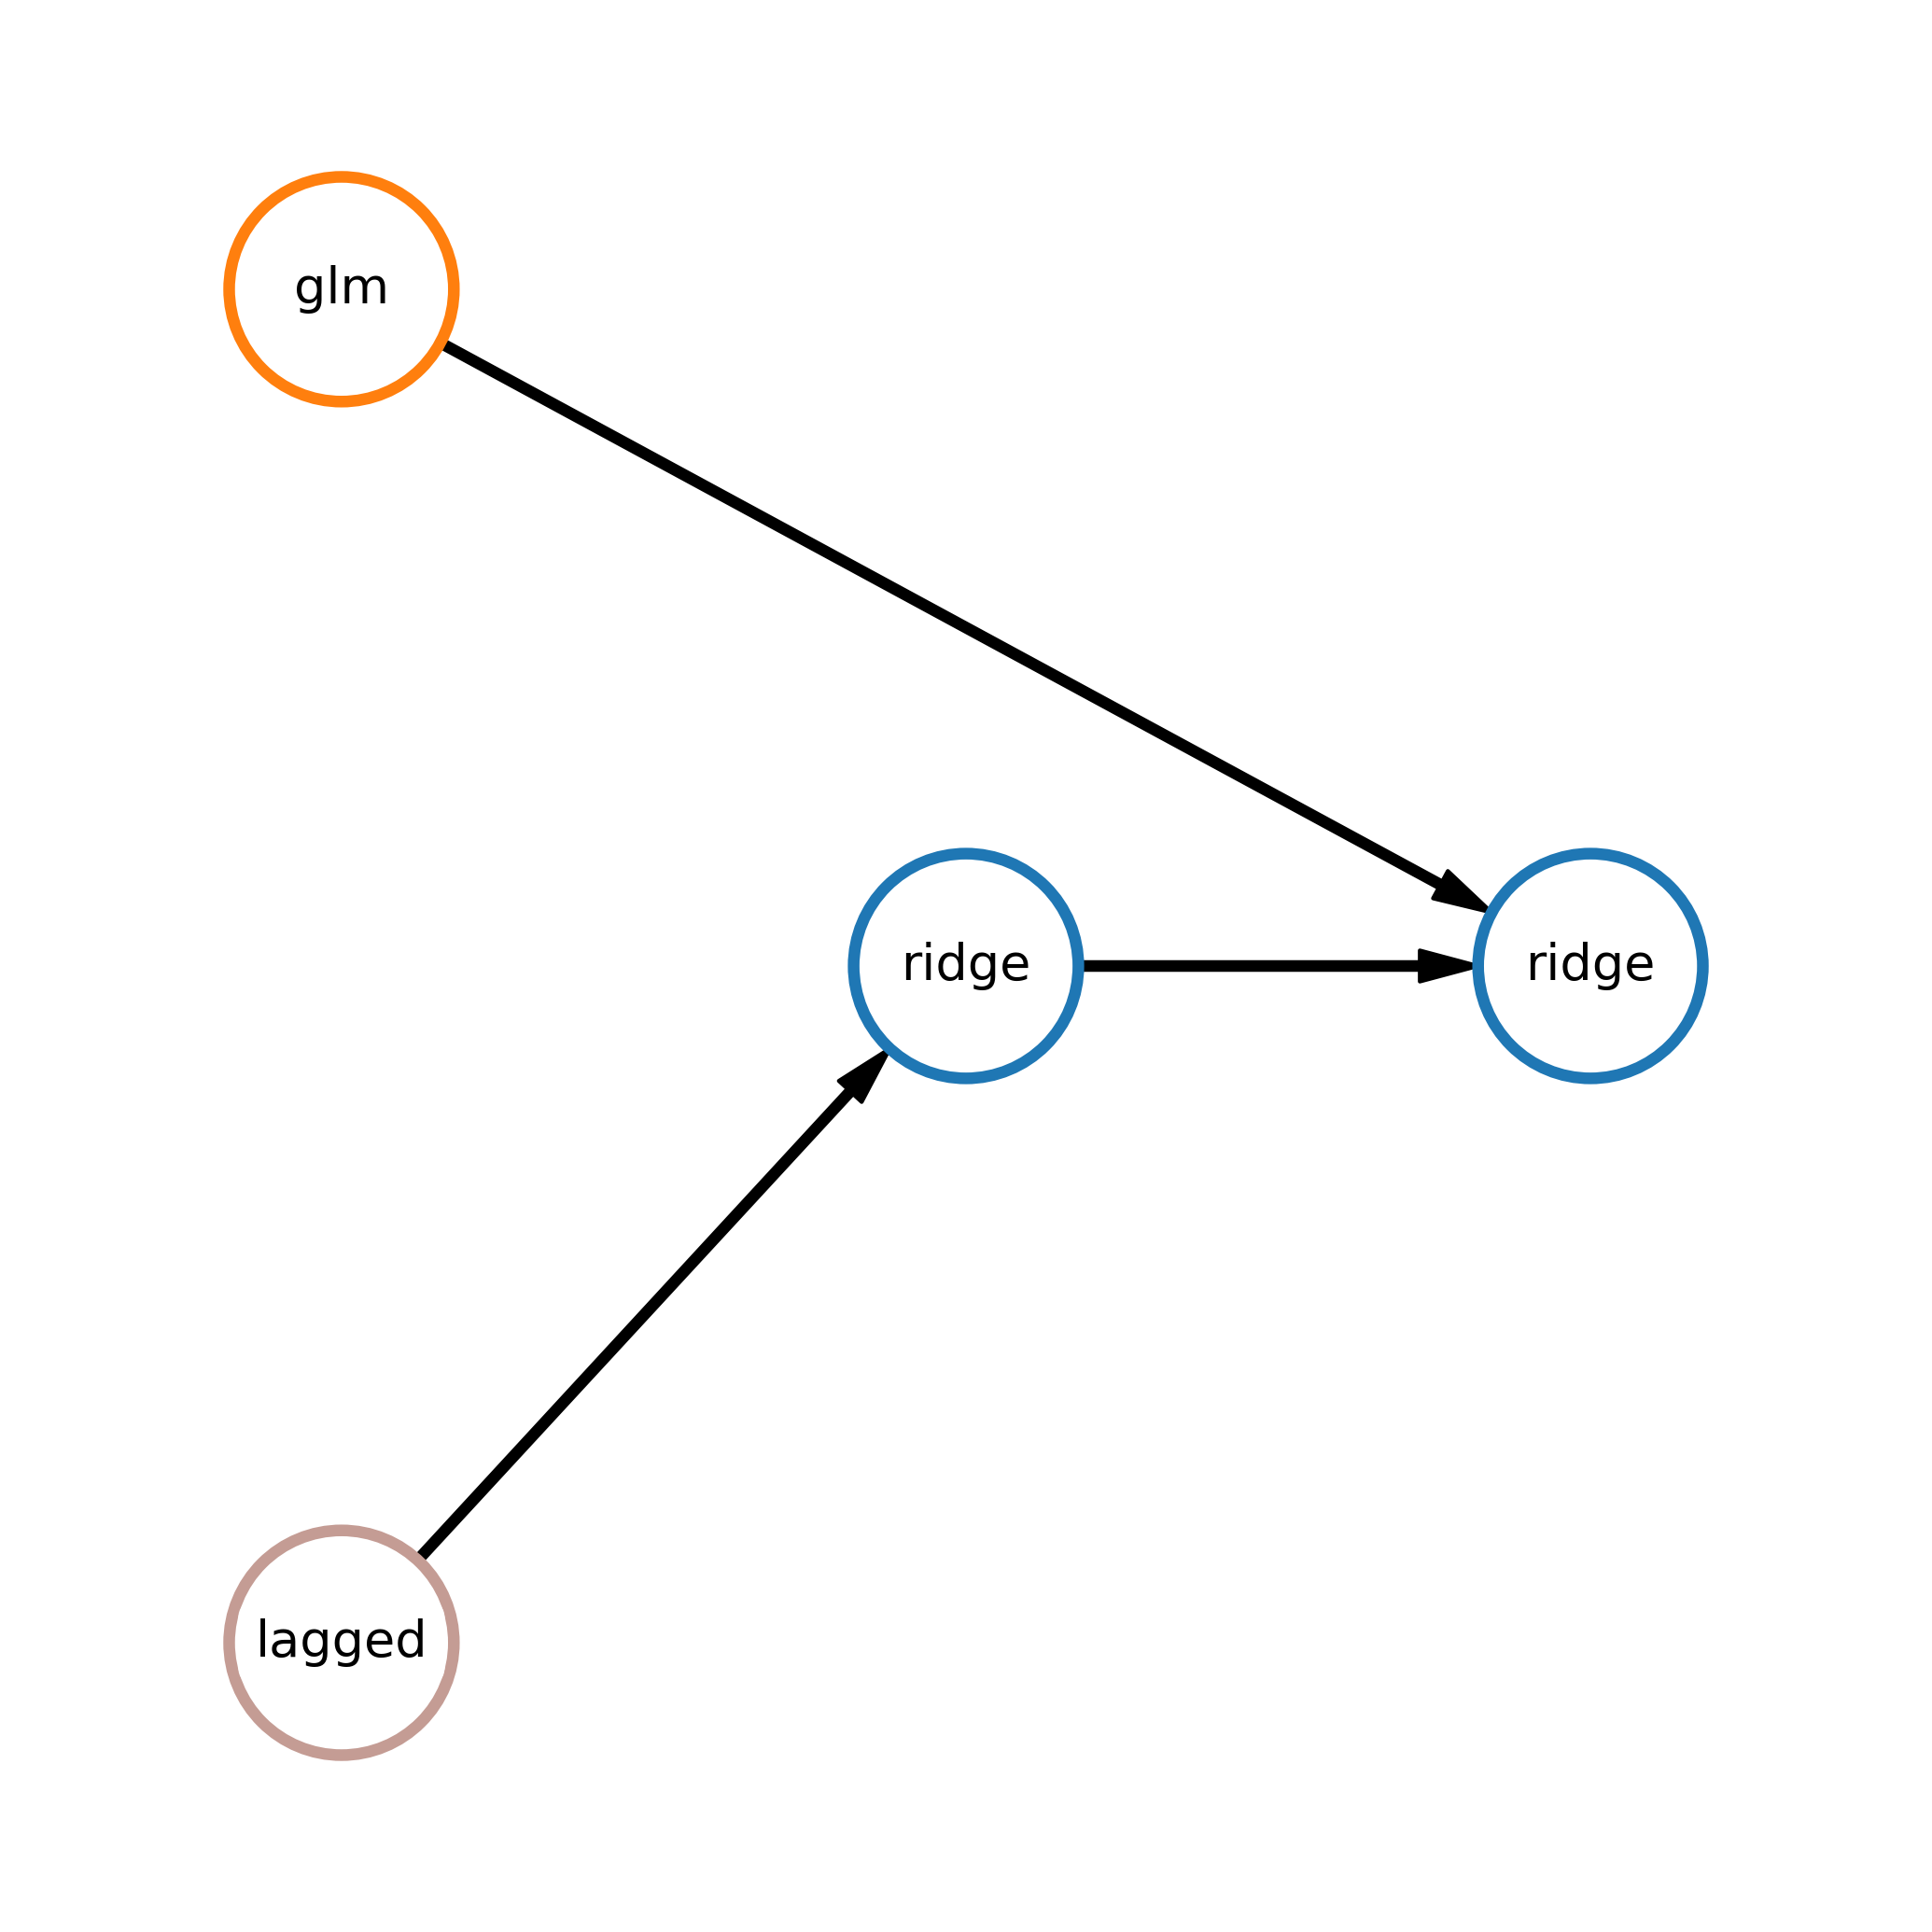

In [64]:
pipeline = model.fit(train_data)
forecast = model.forecast(test_data)
pipeline.show()

In [65]:
import sys
from sklearn.metrics import mean_squared_error as mse
from fedot.core.composer.metrics import QualityMetric
from fedot.core.data.data import InputData, OutputData
from fedot.core.repository.tasks import TsForecastingParams

def quantile_loss(y_true, y_pred, quantile=0.5):
    res = np.array(y_true)-np.array(y_pred)
    metrics=np.empty(shape = [0])
    for x in res:
        if x>=0:
            metrics = np.append(metrics, quantile*x)
        else:
            metrics = np.append(metrics,(quantile-1)*x)
    return np.mean(metrics)

class Quantile_Loss_1(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.1)
        return value


class Quantile_Loss_9(QualityMetric):
    default_value = sys.maxsize

    @staticmethod
    def metric(reference: InputData, predicted: OutputData) -> float:
        value = quantile_loss(reference.target, predicted.predict,quantile = 0.9)
        return value

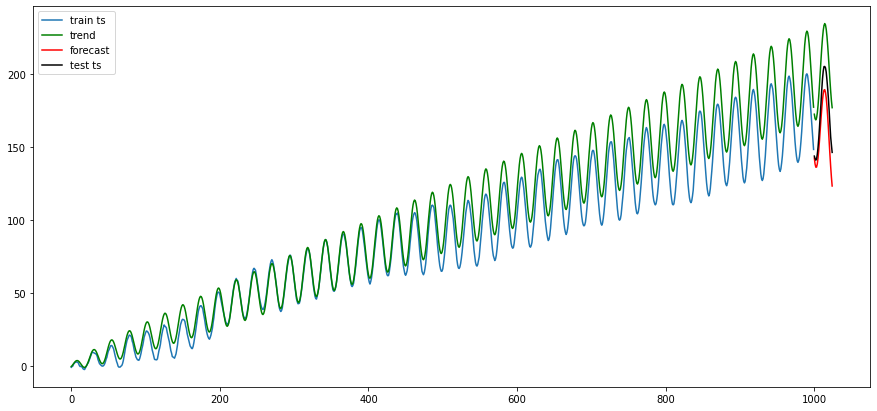

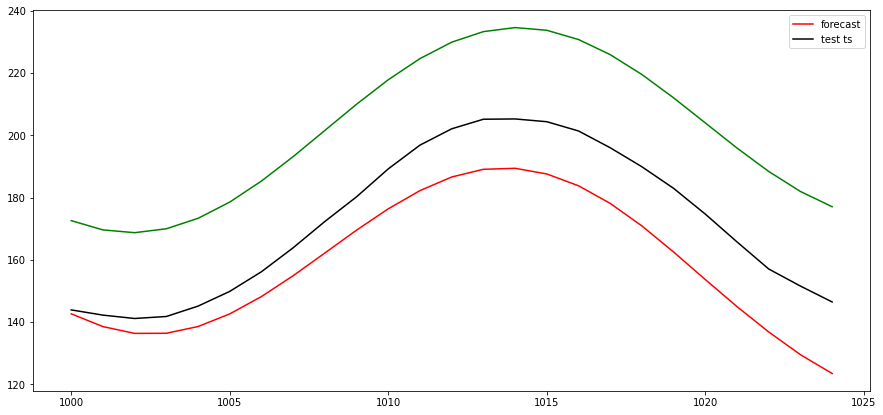

In [66]:
fig,ax  = plt.subplots()
fig.set(figwidth = 15,figheight = 7)
test_range = range(len(ts), len(ts)+len(ts_test))
test_range = range(end,end+horizon)
train_range = range(start,end)
total_range = range(start,end+horizon)

ax.plot(train_range,ts, label = 'train ts')
if trend is not None:
    ax.plot(train_range, trend,color = 'green',label = 'trend')
if trend_test is not None:
    ax.plot(test_range, trend_test,color = 'green')
ax.plot(test_range,forecast, color = 'red', label = 'forecast')
ax.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

fig1,ax1 = plt.subplots()
fig1.set(figwidth = 15,figheight = 7)

if trend_test is not None:
    ax1.plot(test_range, trend_test,color = 'green')
ax1.plot(test_range,forecast, color = 'red', label = 'forecast')
ax1.plot(test_range, ts_test,color = 'black', label = 'test ts')
plt.legend();

In [67]:
#importing for tuning
from fedot.core.optimisers.adapters import PipelineAdapter
from fedot.core.pipelines.tuning.tuner_builder import TunerBuilder
from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum
from fedot.core.pipelines.tuning.tuner_interface import HyperoptTuner
from fedot.core.pipelines.tuning.unified import PipelineTuner
from fedot.core.optimisers.composer_requirements import ComposerRequirements
import datetime

from fedot.core.repository.quality_metrics_repository import RegressionMetricsEnum

#these parameters are the same for both tuners below
task = Task(TaskTypesEnum.ts_forecasting,TsForecastingParams(forecast_length=horizon))
composer_requirements = ComposerRequirements()
composer_requirements.validation_blocks = 2
composer_requirements.n_jobs= -1
composer_requirements.show_progress = True

#this tuner will be used to create lower confidence interval
low_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_1.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

#this tuner will be used to create uppper confidence interval
up_tuner = TunerBuilder(task = task) \
         .with_tuner(PipelineTuner) \
         .with_metric(Quantile_Loss_9.get_value) \
         .with_iterations(10) \
         .with_timeout(datetime.timedelta(minutes=2)) \
         .with_requirements(composer_requirements) \
         .build(train_data)

INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 13:19:07,937 - DataSourceSplitter - Hold out validation is applied.


INFO:root:DataSourceSplitter - Hold out validation is applied.


2022-11-22 13:19:07,947 - DataSourceSplitter - Hold out validation is applied.


In [68]:
def quantile_maker(quantile,arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    up = []
    low = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        q_up = np.quantile(x, 1-quantile)
        up.append(q_up)
        q_low = np.quantile(x,quantile)
        low.append(q_low)
    up = np.array(up)
    low = np.array(low)
    return {'up':up,'low':low}

def mean_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    average = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        average.append(x.mean())
    return average

def median_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    median = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        median.append(np.median(x))
    return median

def absolute_maker(arrays):
    number_arrays = len(arrays)
    l = len(arrays[0])
    maximum = []
    minimum = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        maximum.append(np.max(x))
        minimum.append(np.min(x))
    return {'up':np.array(maximum),'low':np.array(minimum)}

from scipy.stats import trim_mean
def truncated_mean_maker(arrays, quantile=0.1):
    number_arrays = len(arrays)
    l = len(arrays[0])
    trunc_mean = []
    for i in range(l):
        x = np.array([arrays[j][i] for j in range(number_arrays)])
        trunc_mean.append(trim_mean(x, quantile))
    return np.array(trunc_mean)

In [56]:
def conf_int_maker(model = model,
                   train_ts = ts,
                   number_models = 10, 
                   pipelines_show= False):
    """
    model - a fedot model of interest
    train_ts - the ts used for training the model
    ts_test - the testing series; used for plotting and visualization of the results
    number_models - number of models used to create the confidence intervals
    regim - type of getting lower and upper confidence intervals from the upper and lower arrays; 
            default is 'quantile' also avaliable 'average' and 'median', 'absolute_bounds', 'truncated_mean'
    plot - boolean parameter indicating wheter to show plot of the forecast and confidence intervals
    plot_history - boolean parameter indicating whether to show previous series
    """
    
    horizon = model.params.task.task_params.forecast_length
    train_data = model.train_data
    test_data = model.test_data
    forecast = model.predict(test_data)

    #4 lines below allow us take the best models
    fits = []
    for ind in model.history.individuals[-1]:
        fits.append(ind.fitness.value)
    fits = np.sort(np.array(fits))

    #create up and low predictions
    up_predictions = []
    low_predictions = []
    
    for ind in model.history.individuals[-1]:
        if ind.fitness.value<=fits[number_models]:
            pipeline = PipelineAdapter().restore(ind.graph)
            if pipelines_show:
                pipeline.show()
            
            #tuning upper confidence interval
            tuned_pipeline = up_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            up_predictions.append(preds)
            del tuned_pipeline
            
            #tuning lower confidence interval
            tuned_pipeline = low_tuner.tune(pipeline)
            tuned_pipeline.fit(train_data)
            preds = tuned_pipeline.predict(test_data).predict.ravel()
            low_predictions.append(preds)
            del tuned_pipeline
    return {'up_predictions':up_predictions, 'low_predictions':low_predictions}

In [75]:
def conf_int_plotting(up_predictions,
                      low_predictions,
                      horizon=horizon,
                      forecast=forecast,
                      ts=ts,
                      ts_test=ts_test,
                      trend_test=trend_test,
                      regim = 'quantile',
                      plot_history = True,
                      plot_up_int = True,
                      plot_low_int = True,
                      plot_trend = True,
                      plot_forecast = True,
                      plot_upper_train = True,
                      plot_lower_train = True,
                      plot_ts_test = True):
    if regim == 'quantile':
        up_res= quantile_maker(quantile = 0.1, arrays = up_predictions)['up']
        low_res= quantile_maker(quantile = 0.1, arrays = low_predictions)['low']
    if regim == 'mean':
        up_res = mean_maker(arrays = up_predictions)
        low_res = mean_maker(arrays = low_predictions)
    if regim == 'median':
        up_res = median_maker(arrays = up_predictions)
        low_res = median_maker(arrays = low_predictions)
    if regim == 'absolute_bounds':
        up_res = absolute_maker(arrays = up_predictions)['up']
        low_res = absolute_maker(arrays = low_predictions)['low']
    if regim == 'truncated_mean':
        up_res = truncated_mean_maker(arrays = up_predictions)
        low_res = truncated_mean_maker(arrays = low_predictions)
    
    up = np.maximum(up_res,forecast)  
    low = np.minimum(low_res,forecast)

    r = range(1,horizon+1)
    fig,ax = plt.subplots()
    fig.set(figwidth = 15,figheight = 7)
    for i in range(len(up_predictions)):
        if i==0:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow',label = 'preds for up train')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink',label = 'preds for low train')
        else:
            if plot_upper_train:
                ax.plot(r,up_predictions[i], color = 'yellow')
            if plot_lower_train:
                ax.plot(r,low_predictions[i], color = 'pink')    
    if plot_up_int:
        ax.plot(r,up, color = 'blue', label  = 'Up',marker= '.')
    if plot_low_int:
        ax.plot(r,low, color = 'green', label  = 'Low',marker = '.')
    if plot_forecast:
        ax.plot(r,forecast, color = 'red', label = 'Forecast')
    if ts_test is not None:
        if plot_ts_test:
            ax.plot(r,ts_test,color = 'black', label = 'Actual TS')
    if trend_test is not None:
        if plot_trend:
            ax.plot(r, trend_test, color = 'magenta', label = 'True Trend')
    plt.legend()
    if plot_history:
        fig1,ax1 = plt.subplots()
        
        fig1.set(figwidth = 15,figheight = 7)
       
        train_range = range(len(ts))
        test_range = range(len(ts),len(ts)+horizon)
        
        ax1.plot(train_range,ts, color = 'gray',label = 'Train ts')
        ax1.plot(test_range, up,color = 'blue', label = 'Up')
        ax1.plot(test_range, low,color = 'green', label = 'Low')
        ax1.plot(test_range,forecast, color = 'red', label = 'Forecast')
        if ts_test is not None:
            ax1.plot(test_range, ts_test,color = 'black', label = 'Actual TS')  
        if trend_test is not None:
            ax1.plot(test_range, trend_test, color = 'magenta', label = 'True Trend')
        plt.legend();

In [69]:
x = conf_int_maker(model = model, number_models = 10,pipelines_show = False)

INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:20:07,332 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008015 seconds


2022-11-22 13:20:07,564 - build_posterior_wrapper took 0.008015 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:20:07,574 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:08,  1.02trial/s, best loss: 4.021060103297611]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014534 seconds


2022-11-22 13:20:08,556 - build_posterior_wrapper took 0.014534 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 4.021060


2022-11-22 13:20:08,562 - TPE using 1/1 trials with best loss 4.021060
 20%|██        | 2/10 [00:02<00:10,  1.26s/trial, best loss: 4.021060103297611]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006129 seconds


2022-11-22 13:20:10,012 - build_posterior_wrapper took 0.006129 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 4.021060


2022-11-22 13:20:10,027 - TPE using 2/2 trials with best loss 4.021060
 30%|███       | 3/10 [00:02<00:06,  1.12trial/s, best loss: 4.021060103297611]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005886 seconds


2022-11-22 13:20:10,466 - build_posterior_wrapper took 0.005886 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 4.021060


2022-11-22 13:20:10,482 - TPE using 3/3 trials with best loss 4.021060
 40%|████      | 4/10 [00:04<00:06,  1.04s/trial, best loss: 2.1817506405707614]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005911 seconds


2022-11-22 13:20:11,729 - build_posterior_wrapper took 0.005911 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 2.181751


2022-11-22 13:20:11,736 - TPE using 4/4 trials with best loss 2.181751
 50%|█████     | 5/10 [00:05<00:05,  1.05s/trial, best loss: 2.1817506405707614]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005496 seconds


2022-11-22 13:20:12,786 - build_posterior_wrapper took 0.005496 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 2.181751


2022-11-22 13:20:12,800 - TPE using 5/5 trials with best loss 2.181751
 60%|██████    | 6/10 [00:06<00:04,  1.11s/trial, best loss: 2.1817506405707614]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007028 seconds


2022-11-22 13:20:14,032 - build_posterior_wrapper took 0.007028 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 2.181751


2022-11-22 13:20:14,038 - TPE using 6/6 trials with best loss 2.181751
 70%|███████   | 7/10 [00:06<00:02,  1.14trial/s, best loss: 0.4957373546204969]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006882 seconds


2022-11-22 13:20:14,408 - build_posterior_wrapper took 0.006882 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.495737


2022-11-22 13:20:14,416 - TPE using 7/7 trials with best loss 0.495737
 80%|████████  | 8/10 [00:07<00:01,  1.15trial/s, best loss: 0.471895174950814] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006917 seconds


2022-11-22 13:20:15,264 - build_posterior_wrapper took 0.006917 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.471895


2022-11-22 13:20:15,271 - TPE using 8/8 trials with best loss 0.471895
 90%|█████████ | 9/10 [00:08<00:00,  1.03trial/s, best loss: 0.471895174950814]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006916 seconds


2022-11-22 13:20:16,471 - build_posterior_wrapper took 0.006916 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.471895


2022-11-22 13:20:16,485 - TPE using 9/9 trials with best loss 0.471895
100%|██████████| 10/10 [00:10<00:00,  1.02s/trial, best loss: 0.3844862077158641]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:20:19,198 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 0.384 worse than initial (+ 5% deviation) 0.220


2022-11-22 13:20:19,219 - PipelineTuner - Return init pipeline due to the fact that obtained metric 0.384 worse than initial (+ 5% deviation) 0.220


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:20:19,535 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005890 seconds


2022-11-22 13:20:20,755 - build_posterior_wrapper took 0.005890 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:20:20,768 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:09,  1.09s/trial, best loss: 0.9595221702799006]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010173 seconds


2022-11-22 13:20:21,854 - build_posterior_wrapper took 0.010173 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.959522


2022-11-22 13:20:21,866 - TPE using 1/1 trials with best loss 0.959522
 20%|██        | 2/10 [00:01<00:05,  1.59trial/s, best loss: 0.9595221702799006]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006753 seconds


2022-11-22 13:20:22,154 - build_posterior_wrapper took 0.006753 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.959522


2022-11-22 13:20:22,163 - TPE using 2/2 trials with best loss 0.959522
 30%|███       | 3/10 [00:01<00:03,  1.93trial/s, best loss: 0.9276203615558231]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006070 seconds


2022-11-22 13:20:22,539 - build_posterior_wrapper took 0.006070 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.927620


2022-11-22 13:20:22,551 - TPE using 3/3 trials with best loss 0.927620
 40%|████      | 4/10 [00:03<00:05,  1.08trial/s, best loss: 0.9276203615558231]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006087 seconds


2022-11-22 13:20:24,090 - build_posterior_wrapper took 0.006087 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.927620


2022-11-22 13:20:24,106 - TPE using 4/4 trials with best loss 0.927620
 50%|█████     | 5/10 [00:03<00:03,  1.41trial/s, best loss: 0.9276203615558231]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013549 seconds


2022-11-22 13:20:24,420 - build_posterior_wrapper took 0.013549 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.927620


2022-11-22 13:20:24,431 - TPE using 5/5 trials with best loss 0.927620
 60%|██████    | 6/10 [00:04<00:02,  1.42trial/s, best loss: 0.3614406855385003]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005625 seconds


2022-11-22 13:20:25,109 - build_posterior_wrapper took 0.005625 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.361441


2022-11-22 13:20:25,119 - TPE using 6/6 trials with best loss 0.361441
 70%|███████   | 7/10 [00:04<00:01,  1.54trial/s, best loss: 0.3614406855385003]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006414 seconds


2022-11-22 13:20:25,642 - build_posterior_wrapper took 0.006414 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.361441


2022-11-22 13:20:25,649 - TPE using 7/7 trials with best loss 0.361441
 80%|████████  | 8/10 [00:05<00:01,  1.66trial/s, best loss: 0.3614406855385003]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014664 seconds


2022-11-22 13:20:26,158 - build_posterior_wrapper took 0.014664 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.361441


2022-11-22 13:20:26,166 - TPE using 8/8 trials with best loss 0.361441
 90%|█████████ | 9/10 [00:06<00:00,  1.27trial/s, best loss: 0.3614406855385003]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005708 seconds


2022-11-22 13:20:27,337 - build_posterior_wrapper took 0.005708 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.361441


2022-11-22 13:20:27,354 - TPE using 9/9 trials with best loss 0.361441
100%|██████████| 10/10 [00:06<00:00,  1.45trial/s, best loss: 0.3614406855385003]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:20:28,421 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.361 equal or better than initial (+ 5% deviation) 0.370


2022-11-22 13:20:28,430 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.361 equal or better than initial (+ 5% deviation) 0.370


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:20:29,080 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005690 seconds


2022-11-22 13:20:29,335 - build_posterior_wrapper took 0.005690 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:20:29,341 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  1.80trial/s, best loss: 0.40026772982640396]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005543 seconds


2022-11-22 13:20:29,892 - build_posterior_wrapper took 0.005543 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.400268


2022-11-22 13:20:29,902 - TPE using 1/1 trials with best loss 0.400268
 20%|██        | 2/10 [00:01<00:05,  1.52trial/s, best loss: 0.40026772982640396]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005303 seconds


2022-11-22 13:20:30,627 - build_posterior_wrapper took 0.005303 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.400268


2022-11-22 13:20:30,643 - TPE using 2/2 trials with best loss 0.400268
 30%|███       | 3/10 [00:01<00:03,  1.85trial/s, best loss: 0.29276525240605616]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005024 seconds


2022-11-22 13:20:31,024 - build_posterior_wrapper took 0.005024 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.292765


2022-11-22 13:20:31,031 - TPE using 3/3 trials with best loss 0.292765
 40%|████      | 4/10 [00:01<00:02,  2.26trial/s, best loss: 0.29276525240605616]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006185 seconds


2022-11-22 13:20:31,316 - build_posterior_wrapper took 0.006185 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.292765


2022-11-22 13:20:31,326 - TPE using 4/4 trials with best loss 0.292765
 50%|█████     | 5/10 [00:03<00:03,  1.37trial/s, best loss: 0.29276525240605616]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004735 seconds


2022-11-22 13:20:32,555 - build_posterior_wrapper took 0.004735 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.292765


2022-11-22 13:20:32,567 - TPE using 5/5 trials with best loss 0.292765
 60%|██████    | 6/10 [00:04<00:03,  1.31trial/s, best loss: 0.29276525240605616]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005474 seconds


2022-11-22 13:20:33,386 - build_posterior_wrapper took 0.005474 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.292765


2022-11-22 13:20:33,392 - TPE using 6/6 trials with best loss 0.292765
 70%|███████   | 7/10 [00:04<00:02,  1.48trial/s, best loss: 0.2675621623680233] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005825 seconds


2022-11-22 13:20:33,875 - build_posterior_wrapper took 0.005825 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.267562


2022-11-22 13:20:33,881 - TPE using 7/7 trials with best loss 0.267562
 80%|████████  | 8/10 [00:05<00:01,  1.48trial/s, best loss: 0.2675621623680233]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006043 seconds


2022-11-22 13:20:34,557 - build_posterior_wrapper took 0.006043 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.267562


2022-11-22 13:20:34,563 - TPE using 8/8 trials with best loss 0.267562
 90%|█████████ | 9/10 [00:05<00:00,  1.81trial/s, best loss: 0.22550471383038898]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005243 seconds


2022-11-22 13:20:34,832 - build_posterior_wrapper took 0.005243 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.225505


2022-11-22 13:20:34,838 - TPE using 9/9 trials with best loss 0.225505
100%|██████████| 10/10 [00:06<00:00,  1.57trial/s, best loss: 0.22550471383038898]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:20:35,971 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 0.226 worse than initial (+ 5% deviation) 0.209


2022-11-22 13:20:35,977 - PipelineTuner - Return init pipeline due to the fact that obtained metric 0.226 worse than initial (+ 5% deviation) 0.209


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:20:36,175 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006271 seconds


2022-11-22 13:20:36,459 - build_posterior_wrapper took 0.006271 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:20:36,470 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.34trial/s, best loss: 0.35894706893580564]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005325 seconds


2022-11-22 13:20:37,210 - build_posterior_wrapper took 0.005325 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.358947


2022-11-22 13:20:37,223 - TPE using 1/1 trials with best loss 0.358947
 20%|██        | 2/10 [00:01<00:03,  2.08trial/s, best loss: 0.35894706893580564]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005210 seconds


2022-11-22 13:20:37,503 - build_posterior_wrapper took 0.005210 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.358947


2022-11-22 13:20:37,515 - TPE using 2/2 trials with best loss 0.358947
 30%|███       | 3/10 [00:01<00:03,  1.94trial/s, best loss: 0.35894706893580564]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005373 seconds


2022-11-22 13:20:38,061 - build_posterior_wrapper took 0.005373 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.358947


2022-11-22 13:20:38,067 - TPE using 3/3 trials with best loss 0.358947
 40%|████      | 4/10 [00:02<00:03,  1.51trial/s, best loss: 0.22373585054234776]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005463 seconds


2022-11-22 13:20:38,951 - build_posterior_wrapper took 0.005463 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.223736


2022-11-22 13:20:38,964 - TPE using 4/4 trials with best loss 0.223736
 50%|█████     | 5/10 [00:02<00:02,  1.84trial/s, best loss: 0.22373585054234776]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005947 seconds


2022-11-22 13:20:39,281 - build_posterior_wrapper took 0.005947 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.223736


2022-11-22 13:20:39,290 - TPE using 5/5 trials with best loss 0.223736
 60%|██████    | 6/10 [00:03<00:02,  1.71trial/s, best loss: 0.22373585054234776]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005701 seconds


2022-11-22 13:20:39,949 - build_posterior_wrapper took 0.005701 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.223736


2022-11-22 13:20:39,963 - TPE using 6/6 trials with best loss 0.223736
 70%|███████   | 7/10 [00:04<00:01,  1.55trial/s, best loss: 0.22373585054234776]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007227 seconds


2022-11-22 13:20:40,720 - build_posterior_wrapper took 0.007227 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.223736


2022-11-22 13:20:40,726 - TPE using 7/7 trials with best loss 0.223736
 80%|████████  | 8/10 [00:05<00:01,  1.18trial/s, best loss: 0.22373585054234776]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004997 seconds


2022-11-22 13:20:41,987 - build_posterior_wrapper took 0.004997 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.223736


2022-11-22 13:20:41,993 - TPE using 8/8 trials with best loss 0.223736
 90%|█████████ | 9/10 [00:06<00:00,  1.24trial/s, best loss: 0.22373585054234776]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005008 seconds


2022-11-22 13:20:42,708 - build_posterior_wrapper took 0.005008 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.223736


2022-11-22 13:20:42,714 - TPE using 9/9 trials with best loss 0.223736
100%|██████████| 10/10 [00:07<00:00,  1.36trial/s, best loss: 0.22373585054234776]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:20:44,764 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.224 equal or better than initial (+ 5% deviation) 0.553


2022-11-22 13:20:44,771 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.224 equal or better than initial (+ 5% deviation) 0.553


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:20:45,563 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005328 seconds


2022-11-22 13:20:45,807 - build_posterior_wrapper took 0.005328 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:20:45,819 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:12,  1.35s/trial, best loss: 195.44992967162477]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006241 seconds


2022-11-22 13:20:47,160 - build_posterior_wrapper took 0.006241 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 195.449930


2022-11-22 13:20:47,166 - TPE using 1/1 trials with best loss 195.449930
 20%|██        | 2/10 [00:02<00:08,  1.07s/trial, best loss: 1.4446590704677282]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005820 seconds


2022-11-22 13:20:48,034 - build_posterior_wrapper took 0.005820 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.444659


2022-11-22 13:20:48,040 - TPE using 2/2 trials with best loss 1.444659
 30%|███       | 3/10 [00:03<00:07,  1.13s/trial, best loss: 1.4446590704677282]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006538 seconds


2022-11-22 13:20:49,239 - build_posterior_wrapper took 0.006538 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.444659


2022-11-22 13:20:49,245 - TPE using 3/3 trials with best loss 1.444659
 40%|████      | 4/10 [00:04<00:06,  1.10s/trial, best loss: 1.4446590704677282]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005263 seconds


2022-11-22 13:20:50,296 - build_posterior_wrapper took 0.005263 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.444659


2022-11-22 13:20:50,308 - TPE using 4/4 trials with best loss 1.444659
 50%|█████     | 5/10 [00:05<00:05,  1.18s/trial, best loss: 1.4446590704677282]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004727 seconds


2022-11-22 13:20:51,615 - build_posterior_wrapper took 0.004727 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.444659


2022-11-22 13:20:51,631 - TPE using 5/5 trials with best loss 1.444659
 60%|██████    | 6/10 [00:06<00:04,  1.03s/trial, best loss: 0.2718820462189593]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005499 seconds


2022-11-22 13:20:52,339 - build_posterior_wrapper took 0.005499 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.271882


2022-11-22 13:20:52,345 - TPE using 6/6 trials with best loss 0.271882
 70%|███████   | 7/10 [00:06<00:02,  1.25trial/s, best loss: 0.2718820462189593]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004710 seconds


2022-11-22 13:20:52,666 - build_posterior_wrapper took 0.004710 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.271882


2022-11-22 13:20:52,679 - TPE using 7/7 trials with best loss 0.271882
 80%|████████  | 8/10 [00:07<00:01,  1.41trial/s, best loss: 0.2718820462189593]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005365 seconds


2022-11-22 13:20:53,191 - build_posterior_wrapper took 0.005365 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.271882


2022-11-22 13:20:53,213 - TPE using 8/8 trials with best loss 0.271882
 90%|█████████ | 9/10 [00:07<00:00,  1.73trial/s, best loss: 0.16270275498138922]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004740 seconds


2022-11-22 13:20:53,474 - build_posterior_wrapper took 0.004740 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.162703


2022-11-22 13:20:53,487 - TPE using 9/9 trials with best loss 0.162703
100%|██████████| 10/10 [00:08<00:00,  1.23trial/s, best loss: 0.16270275498138922]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:20:54,157 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.163 equal or better than initial (+ 5% deviation) 0.220


2022-11-22 13:20:54,163 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.163 equal or better than initial (+ 5% deviation) 0.220


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:20:54,401 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004671 seconds


2022-11-22 13:20:54,689 - build_posterior_wrapper took 0.004671 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:20:54,703 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  1.82trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006622 seconds


2022-11-22 13:20:55,244 - build_posterior_wrapper took 0.006622 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.411408


2022-11-22 13:20:55,252 - TPE using 1/1 trials with best loss 0.411408
 20%|██        | 2/10 [00:01<00:07,  1.09trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009396 seconds


2022-11-22 13:20:56,428 - build_posterior_wrapper took 0.009396 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.411408


2022-11-22 13:20:56,441 - TPE using 2/2 trials with best loss 0.411408
 30%|███       | 3/10 [00:02<00:04,  1.45trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005537 seconds


2022-11-22 13:20:56,834 - build_posterior_wrapper took 0.005537 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.411408


2022-11-22 13:20:56,841 - TPE using 3/3 trials with best loss 0.411408
 40%|████      | 4/10 [00:02<00:03,  1.52trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011755 seconds


2022-11-22 13:20:57,450 - build_posterior_wrapper took 0.011755 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.411408


2022-11-22 13:20:57,459 - TPE using 4/4 trials with best loss 0.411408
 50%|█████     | 5/10 [00:03<00:04,  1.15trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010178 seconds


2022-11-22 13:20:58,689 - build_posterior_wrapper took 0.010178 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.411408


2022-11-22 13:20:58,699 - TPE using 5/5 trials with best loss 0.411408
 60%|██████    | 6/10 [00:04<00:03,  1.14trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005500 seconds


2022-11-22 13:20:59,583 - build_posterior_wrapper took 0.005500 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.411408


2022-11-22 13:20:59,593 - TPE using 6/6 trials with best loss 0.411408
 70%|███████   | 7/10 [00:05<00:02,  1.06trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008832 seconds


2022-11-22 13:21:00,663 - build_posterior_wrapper took 0.008832 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.411408


2022-11-22 13:21:00,673 - TPE using 7/7 trials with best loss 0.411408
 80%|████████  | 8/10 [00:06<00:01,  1.29trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007715 seconds


2022-11-22 13:21:01,071 - build_posterior_wrapper took 0.007715 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.411408


2022-11-22 13:21:01,088 - TPE using 8/8 trials with best loss 0.411408
 90%|█████████ | 9/10 [00:07<00:00,  1.30trial/s, best loss: 0.4114082011778269]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005369 seconds


2022-11-22 13:21:01,838 - build_posterior_wrapper took 0.005369 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.411408


2022-11-22 13:21:01,849 - TPE using 9/9 trials with best loss 0.411408
100%|██████████| 10/10 [00:07<00:00,  1.29trial/s, best loss: 0.3994406622047632]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:21:03,063 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.399 equal or better than initial (+ 5% deviation) 1.219


2022-11-22 13:21:03,074 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.399 equal or better than initial (+ 5% deviation) 1.219


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:21:03,663 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006526 seconds


2022-11-22 13:21:03,942 - build_posterior_wrapper took 0.006526 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:21:03,956 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:08,  1.10trial/s, best loss: 172.47482119726683]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012998 seconds


2022-11-22 13:21:04,860 - build_posterior_wrapper took 0.012998 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 172.474821


2022-11-22 13:21:04,866 - TPE using 1/1 trials with best loss 172.474821
 20%|██        | 2/10 [00:01<00:04,  1.63trial/s, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005871 seconds


2022-11-22 13:21:05,269 - build_posterior_wrapper took 0.005871 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.221325


2022-11-22 13:21:05,283 - TPE using 2/2 trials with best loss 0.221325
 30%|███       | 3/10 [00:03<00:08,  1.17s/trial, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010375 seconds


2022-11-22 13:21:07,093 - build_posterior_wrapper took 0.010375 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.221325


2022-11-22 13:21:07,107 - TPE using 3/3 trials with best loss 0.221325
 40%|████      | 4/10 [00:04<00:06,  1.13s/trial, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009076 seconds


2022-11-22 13:21:08,158 - build_posterior_wrapper took 0.009076 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.221325


2022-11-22 13:21:08,166 - TPE using 4/4 trials with best loss 0.221325
 50%|█████     | 5/10 [00:04<00:04,  1.13trial/s, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006680 seconds


2022-11-22 13:21:08,612 - build_posterior_wrapper took 0.006680 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.221325


2022-11-22 13:21:08,626 - TPE using 5/5 trials with best loss 0.221325
 60%|██████    | 6/10 [00:06<00:04,  1.06s/trial, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006260 seconds


2022-11-22 13:21:10,016 - build_posterior_wrapper took 0.006260 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.221325


2022-11-22 13:21:10,030 - TPE using 6/6 trials with best loss 0.221325
 70%|███████   | 7/10 [00:07<00:03,  1.10s/trial, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006008 seconds


2022-11-22 13:21:11,200 - build_posterior_wrapper took 0.006008 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.221325


2022-11-22 13:21:11,211 - TPE using 7/7 trials with best loss 0.221325
 80%|████████  | 8/10 [00:07<00:01,  1.17trial/s, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006340 seconds


2022-11-22 13:21:11,534 - build_posterior_wrapper took 0.006340 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.221325


2022-11-22 13:21:11,546 - TPE using 8/8 trials with best loss 0.221325
 90%|█████████ | 9/10 [00:08<00:01,  1.01s/trial, best loss: 0.22132458777669126]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006575 seconds


2022-11-22 13:21:12,896 - build_posterior_wrapper took 0.006575 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.221325


2022-11-22 13:21:12,908 - TPE using 9/9 trials with best loss 0.221325
100%|██████████| 10/10 [00:10<00:00,  1.01s/trial, best loss: 0.22132458777669126]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:21:14,415 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 0.221 worse than initial (+ 5% deviation) 0.220


2022-11-22 13:21:14,432 - PipelineTuner - Return init pipeline due to the fact that obtained metric 0.221 worse than initial (+ 5% deviation) 0.220


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:21:14,642 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007838 seconds


2022-11-22 13:21:15,089 - build_posterior_wrapper took 0.007838 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:21:15,104 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.30s/trial, best loss: 3.2857547141745]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005826 seconds


2022-11-22 13:21:16,386 - build_posterior_wrapper took 0.005826 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 3.285755


2022-11-22 13:21:16,397 - TPE using 1/1 trials with best loss 3.285755
 20%|██        | 2/10 [00:02<00:12,  1.52s/trial, best loss: 0.824484498947085]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005982 seconds


2022-11-22 13:21:18,059 - build_posterior_wrapper took 0.005982 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.824484


2022-11-22 13:21:18,078 - TPE using 2/2 trials with best loss 0.824484
 30%|███       | 3/10 [00:03<00:06,  1.00trial/s, best loss: 0.5233653348838524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005720 seconds


2022-11-22 13:21:18,442 - build_posterior_wrapper took 0.005720 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.523365


2022-11-22 13:21:18,459 - TPE using 3/3 trials with best loss 0.523365
 40%|████      | 4/10 [00:03<00:04,  1.37trial/s, best loss: 0.5233653348838524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005610 seconds


2022-11-22 13:21:18,764 - build_posterior_wrapper took 0.005610 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.523365


2022-11-22 13:21:18,777 - TPE using 4/4 trials with best loss 0.523365
 50%|█████     | 5/10 [00:04<00:03,  1.64trial/s, best loss: 0.5233653348838524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005626 seconds


2022-11-22 13:21:19,157 - build_posterior_wrapper took 0.005626 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.523365


2022-11-22 13:21:19,168 - TPE using 5/5 trials with best loss 0.523365
 60%|██████    | 6/10 [00:05<00:03,  1.07trial/s, best loss: 0.5233653348838524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005763 seconds


2022-11-22 13:21:20,733 - build_posterior_wrapper took 0.005763 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.523365


2022-11-22 13:21:20,750 - TPE using 6/6 trials with best loss 0.523365
 70%|███████   | 7/10 [00:06<00:02,  1.03trial/s, best loss: 0.5233653348838524]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005553 seconds


2022-11-22 13:21:21,770 - build_posterior_wrapper took 0.005553 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.523365


2022-11-22 13:21:21,786 - TPE using 7/7 trials with best loss 0.523365
 80%|████████  | 8/10 [00:07<00:01,  1.20trial/s, best loss: 0.33542701655274426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006101 seconds


2022-11-22 13:21:22,312 - build_posterior_wrapper took 0.006101 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.335427


2022-11-22 13:21:22,323 - TPE using 8/8 trials with best loss 0.335427
 90%|█████████ | 9/10 [00:07<00:00,  1.51trial/s, best loss: 0.33542701655274426]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006392 seconds


2022-11-22 13:21:22,601 - build_posterior_wrapper took 0.006392 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.335427


2022-11-22 13:21:22,613 - TPE using 9/9 trials with best loss 0.335427
100%|██████████| 10/10 [00:08<00:00,  1.14trial/s, best loss: 0.33542701655274426]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:21:24,391 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.335 equal or better than initial (+ 5% deviation) 1.687


2022-11-22 13:21:24,405 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.335 equal or better than initial (+ 5% deviation) 1.687


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:21:24,957 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007868 seconds


2022-11-22 13:21:25,246 - build_posterior_wrapper took 0.007868 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:21:25,260 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:03,  2.73trial/s, best loss: 0.32590172873438467]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007294 seconds


2022-11-22 13:21:25,619 - build_posterior_wrapper took 0.007294 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.325902


2022-11-22 13:21:25,634 - TPE using 1/1 trials with best loss 0.325902
 20%|██        | 2/10 [00:00<00:02,  2.71trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006886 seconds


2022-11-22 13:21:25,985 - build_posterior_wrapper took 0.006886 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.218506


2022-11-22 13:21:25,993 - TPE using 2/2 trials with best loss 0.218506
 30%|███       | 3/10 [00:01<00:02,  2.80trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006706 seconds


2022-11-22 13:21:26,329 - build_posterior_wrapper took 0.006706 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.218506


2022-11-22 13:21:26,336 - TPE using 3/3 trials with best loss 0.218506
 40%|████      | 4/10 [00:02<00:04,  1.47trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006312 seconds


2022-11-22 13:21:27,506 - build_posterior_wrapper took 0.006312 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.218506


2022-11-22 13:21:27,512 - TPE using 4/4 trials with best loss 0.218506
 50%|█████     | 5/10 [00:02<00:03,  1.47trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005865 seconds


2022-11-22 13:21:28,186 - build_posterior_wrapper took 0.005865 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.218506


2022-11-22 13:21:28,198 - TPE using 5/5 trials with best loss 0.218506
 60%|██████    | 6/10 [00:04<00:03,  1.21trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007716 seconds


2022-11-22 13:21:29,301 - build_posterior_wrapper took 0.007716 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.218506


2022-11-22 13:21:29,313 - TPE using 6/6 trials with best loss 0.218506
 70%|███████   | 7/10 [00:04<00:02,  1.15trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006526 seconds


2022-11-22 13:21:30,248 - build_posterior_wrapper took 0.006526 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.218506


2022-11-22 13:21:30,263 - TPE using 7/7 trials with best loss 0.218506
 80%|████████  | 8/10 [00:05<00:01,  1.32trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005515 seconds


2022-11-22 13:21:30,770 - build_posterior_wrapper took 0.005515 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.218506


2022-11-22 13:21:30,786 - TPE using 8/8 trials with best loss 0.218506
 90%|█████████ | 9/10 [00:06<00:00,  1.04trial/s, best loss: 0.21850613863960341]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010538 seconds


2022-11-22 13:21:32,185 - build_posterior_wrapper took 0.010538 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.218506


2022-11-22 13:21:32,201 - TPE using 9/9 trials with best loss 0.218506
100%|██████████| 10/10 [00:07<00:00,  1.27trial/s, best loss: 0.19865061702679107]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:21:33,950 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.199 equal or better than initial (+ 5% deviation) 0.221


2022-11-22 13:21:33,971 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.199 equal or better than initial (+ 5% deviation) 0.221


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:21:34,814 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005867 seconds


2022-11-22 13:21:35,637 - build_posterior_wrapper took 0.005867 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:21:35,650 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:09,  1.04s/trial, best loss: 0.5644041677093733]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006300 seconds


2022-11-22 13:21:36,682 - build_posterior_wrapper took 0.006300 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.564404


2022-11-22 13:21:36,696 - TPE using 1/1 trials with best loss 0.564404
 20%|██        | 2/10 [00:02<00:10,  1.26s/trial, best loss: 0.5644041677093733]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010659 seconds


2022-11-22 13:21:38,105 - build_posterior_wrapper took 0.010659 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.564404


2022-11-22 13:21:38,118 - TPE using 2/2 trials with best loss 0.564404
 30%|███       | 3/10 [00:03<00:07,  1.08s/trial, best loss: 0.5644041677093733]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006484 seconds


2022-11-22 13:21:38,967 - build_posterior_wrapper took 0.006484 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.564404


2022-11-22 13:21:38,987 - TPE using 3/3 trials with best loss 0.564404
 40%|████      | 4/10 [00:04<00:05,  1.02trial/s, best loss: 0.5644041677093733]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006148 seconds


2022-11-22 13:21:39,777 - build_posterior_wrapper took 0.006148 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.564404


2022-11-22 13:21:39,790 - TPE using 4/4 trials with best loss 0.564404
 50%|█████     | 5/10 [00:05<00:05,  1.08s/trial, best loss: 0.5644041677093733]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005731 seconds


2022-11-22 13:21:41,048 - build_posterior_wrapper took 0.005731 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.564404


2022-11-22 13:21:41,064 - TPE using 5/5 trials with best loss 0.564404
 60%|██████    | 6/10 [00:06<00:04,  1.24s/trial, best loss: 0.5644041677093733]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006092 seconds


2022-11-22 13:21:42,591 - build_posterior_wrapper took 0.006092 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.564404


2022-11-22 13:21:42,603 - TPE using 6/6 trials with best loss 0.564404
 70%|███████   | 7/10 [00:07<00:03,  1.07s/trial, best loss: 0.3574230029122878]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006120 seconds


2022-11-22 13:21:43,334 - build_posterior_wrapper took 0.006120 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.357423


2022-11-22 13:21:43,351 - TPE using 7/7 trials with best loss 0.357423
 80%|████████  | 8/10 [00:09<00:02,  1.23s/trial, best loss: 0.3574230029122878]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005953 seconds


2022-11-22 13:21:44,881 - build_posterior_wrapper took 0.005953 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.357423


2022-11-22 13:21:44,895 - TPE using 8/8 trials with best loss 0.357423
 90%|█████████ | 9/10 [00:09<00:00,  1.00trial/s, best loss: 0.3574230029122878]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007127 seconds


2022-11-22 13:21:45,378 - build_posterior_wrapper took 0.007127 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.357423


2022-11-22 13:21:45,392 - TPE using 9/9 trials with best loss 0.357423
100%|██████████| 10/10 [00:10<00:00,  1.02s/trial, best loss: 0.35602429393506624]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:21:46,299 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.356 equal or better than initial (+ 5% deviation) 1.872


2022-11-22 13:21:46,315 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.356 equal or better than initial (+ 5% deviation) 1.872


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:21:46,760 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005871 seconds


2022-11-22 13:21:47,040 - build_posterior_wrapper took 0.005871 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:21:47,052 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:08,  1.07trial/s, best loss: 181.97900967385414]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005641 seconds


2022-11-22 13:21:47,977 - build_posterior_wrapper took 0.005641 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 181.979010


2022-11-22 13:21:47,985 - TPE using 1/1 trials with best loss 181.979010
 20%|██        | 2/10 [00:02<00:09,  1.23s/trial, best loss: 16.756514002713214]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006192 seconds


2022-11-22 13:21:49,416 - build_posterior_wrapper took 0.006192 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 16.756514


2022-11-22 13:21:49,423 - TPE using 2/2 trials with best loss 16.756514
 30%|███       | 3/10 [00:03<00:07,  1.05s/trial, best loss: 0.30878738486866064]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007092 seconds


2022-11-22 13:21:50,256 - build_posterior_wrapper took 0.007092 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.308787


2022-11-22 13:21:50,266 - TPE using 3/3 trials with best loss 0.308787
 40%|████      | 4/10 [00:03<00:04,  1.30trial/s, best loss: 0.30878738486866064]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007533 seconds


2022-11-22 13:21:50,592 - build_posterior_wrapper took 0.007533 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.308787


2022-11-22 13:21:50,599 - TPE using 4/4 trials with best loss 0.308787
 50%|█████     | 5/10 [00:03<00:03,  1.67trial/s, best loss: 0.20041096558486143]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006718 seconds


2022-11-22 13:21:50,890 - build_posterior_wrapper took 0.006718 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.200411


2022-11-22 13:21:50,898 - TPE using 5/5 trials with best loss 0.200411
 60%|██████    | 6/10 [00:04<00:02,  1.41trial/s, best loss: 0.20041096558486143]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005761 seconds


2022-11-22 13:21:51,807 - build_posterior_wrapper took 0.005761 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.200411


2022-11-22 13:21:51,814 - TPE using 6/6 trials with best loss 0.200411
 70%|███████   | 7/10 [00:05<00:02,  1.39trial/s, best loss: 0.18468904291710447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005559 seconds


2022-11-22 13:21:52,550 - build_posterior_wrapper took 0.005559 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.184689


2022-11-22 13:21:52,563 - TPE using 7/7 trials with best loss 0.184689
 80%|████████  | 8/10 [00:06<00:01,  1.48trial/s, best loss: 0.18468904291710447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007458 seconds


2022-11-22 13:21:53,136 - build_posterior_wrapper took 0.007458 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.184689


2022-11-22 13:21:53,144 - TPE using 8/8 trials with best loss 0.184689
 90%|█████████ | 9/10 [00:06<00:00,  1.38trial/s, best loss: 0.18468904291710447]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011567 seconds


2022-11-22 13:21:53,977 - build_posterior_wrapper took 0.011567 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.184689


2022-11-22 13:21:53,994 - TPE using 9/9 trials with best loss 0.184689
100%|██████████| 10/10 [00:07<00:00,  1.31trial/s, best loss: 0.18468904291710447]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:21:55,464 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.185 equal or better than initial (+ 5% deviation) 0.220


2022-11-22 13:21:55,470 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.185 equal or better than initial (+ 5% deviation) 0.220


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:21:56,297 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010849 seconds


2022-11-22 13:21:57,096 - build_posterior_wrapper took 0.010849 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:21:57,102 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.44trial/s, best loss: 1.473447363705243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007104 seconds


2022-11-22 13:21:57,795 - build_posterior_wrapper took 0.007104 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.473447


2022-11-22 13:21:57,801 - TPE using 1/1 trials with best loss 1.473447
 20%|██        | 2/10 [00:02<00:08,  1.11s/trial, best loss: 1.473447363705243]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008256 seconds


2022-11-22 13:21:59,185 - build_posterior_wrapper took 0.008256 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.473447


2022-11-22 13:21:59,190 - TPE using 2/2 trials with best loss 1.473447
 30%|███       | 3/10 [00:03<00:07,  1.05s/trial, best loss: 1.41713514100096] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009058 seconds


2022-11-22 13:22:00,161 - build_posterior_wrapper took 0.009058 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.417135


2022-11-22 13:22:00,168 - TPE using 3/3 trials with best loss 1.417135
 40%|████      | 4/10 [00:03<00:05,  1.08trial/s, best loss: 0.2913122143868495]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012839 seconds


2022-11-22 13:22:00,904 - build_posterior_wrapper took 0.012839 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.291312


2022-11-22 13:22:00,913 - TPE using 4/4 trials with best loss 0.291312
 50%|█████     | 5/10 [00:04<00:04,  1.06trial/s, best loss: 0.2913122143868495]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012637 seconds


2022-11-22 13:22:01,870 - build_posterior_wrapper took 0.012637 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.291312


2022-11-22 13:22:01,880 - TPE using 5/5 trials with best loss 0.291312
 60%|██████    | 6/10 [00:05<00:03,  1.16trial/s, best loss: 0.2913122143868495]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011912 seconds


2022-11-22 13:22:02,584 - build_posterior_wrapper took 0.011912 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.291312


2022-11-22 13:22:02,598 - TPE using 6/6 trials with best loss 0.291312
 70%|███████   | 7/10 [00:06<00:03,  1.04s/trial, best loss: 0.2913122143868495]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005829 seconds


2022-11-22 13:22:03,975 - build_posterior_wrapper took 0.005829 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.291312


2022-11-22 13:22:03,989 - TPE using 7/7 trials with best loss 0.291312
 80%|████████  | 8/10 [00:07<00:01,  1.03trial/s, best loss: 0.2913122143868495]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006470 seconds


2022-11-22 13:22:04,817 - build_posterior_wrapper took 0.006470 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.291312


2022-11-22 13:22:04,837 - TPE using 8/8 trials with best loss 0.291312
 90%|█████████ | 9/10 [00:08<00:00,  1.03trial/s, best loss: 0.2913122143868495]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006151 seconds


2022-11-22 13:22:05,790 - build_posterior_wrapper took 0.006151 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.291312


2022-11-22 13:22:05,802 - TPE using 9/9 trials with best loss 0.291312
100%|██████████| 10/10 [00:09<00:00,  1.03trial/s, best loss: 0.2913122143868495]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:22:07,272 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.291 equal or better than initial (+ 5% deviation) 0.452


2022-11-22 13:22:07,287 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.291 equal or better than initial (+ 5% deviation) 0.452


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:22:07,731 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004478 seconds


2022-11-22 13:22:07,967 - build_posterior_wrapper took 0.004478 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:22:07,978 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:09,  1.04s/trial, best loss: 12.410071827496408]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004743 seconds


2022-11-22 13:22:09,007 - build_posterior_wrapper took 0.004743 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 12.410072


2022-11-22 13:22:09,019 - TPE using 1/1 trials with best loss 12.410072
 20%|██        | 2/10 [00:01<00:06,  1.28trial/s, best loss: 12.410071827496408]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004817 seconds


2022-11-22 13:22:09,608 - build_posterior_wrapper took 0.004817 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 12.410072


2022-11-22 13:22:09,620 - TPE using 2/2 trials with best loss 12.410072
 30%|███       | 3/10 [00:02<00:04,  1.43trial/s, best loss: 0.2798239135691105]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005704 seconds


2022-11-22 13:22:10,216 - build_posterior_wrapper took 0.005704 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.279824


2022-11-22 13:22:10,231 - TPE using 3/3 trials with best loss 0.279824
 40%|████      | 4/10 [00:03<00:05,  1.04trial/s, best loss: 0.2798239135691105]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009755 seconds


2022-11-22 13:22:11,574 - build_posterior_wrapper took 0.009755 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.279824


2022-11-22 13:22:11,582 - TPE using 4/4 trials with best loss 0.279824
 50%|█████     | 5/10 [00:03<00:03,  1.34trial/s, best loss: 0.19708296068098252]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005302 seconds


2022-11-22 13:22:11,938 - build_posterior_wrapper took 0.005302 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.197083


2022-11-22 13:22:11,951 - TPE using 5/5 trials with best loss 0.197083
 60%|██████    | 6/10 [00:04<00:02,  1.56trial/s, best loss: 0.19708296068098252]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005146 seconds


2022-11-22 13:22:12,381 - build_posterior_wrapper took 0.005146 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.197083


2022-11-22 13:22:12,392 - TPE using 6/6 trials with best loss 0.197083
 70%|███████   | 7/10 [00:05<00:02,  1.11trial/s, best loss: 0.19708296068098252]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004903 seconds


2022-11-22 13:22:13,809 - build_posterior_wrapper took 0.004903 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.197083


2022-11-22 13:22:13,819 - TPE using 7/7 trials with best loss 0.197083
 80%|████████  | 8/10 [00:07<00:02,  1.03s/trial, best loss: 0.19708296068098252]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005152 seconds


2022-11-22 13:22:15,131 - build_posterior_wrapper took 0.005152 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.197083


2022-11-22 13:22:15,141 - TPE using 8/8 trials with best loss 0.197083
 90%|█████████ | 9/10 [00:08<00:01,  1.15s/trial, best loss: 0.19708296068098252]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005100 seconds


2022-11-22 13:22:16,546 - build_posterior_wrapper took 0.005100 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.197083


2022-11-22 13:22:16,557 - TPE using 9/9 trials with best loss 0.197083
100%|██████████| 10/10 [00:09<00:00,  1.07trial/s, best loss: 0.19708296068098252]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:22:17,689 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.197 equal or better than initial (+ 5% deviation) 0.209


2022-11-22 13:22:17,704 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.197 equal or better than initial (+ 5% deviation) 0.209


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:22:18,021 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004374 seconds


2022-11-22 13:22:18,385 - build_posterior_wrapper took 0.004374 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:22:18,395 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.36trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004734 seconds


2022-11-22 13:22:19,121 - build_posterior_wrapper took 0.004734 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.286648


2022-11-22 13:22:19,134 - TPE using 1/1 trials with best loss 0.286648
 20%|██        | 2/10 [00:01<00:06,  1.33trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004735 seconds


2022-11-22 13:22:19,895 - build_posterior_wrapper took 0.004735 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.286648


2022-11-22 13:22:19,906 - TPE using 2/2 trials with best loss 0.286648
 30%|███       | 3/10 [00:02<00:04,  1.51trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006166 seconds


2022-11-22 13:22:20,451 - build_posterior_wrapper took 0.006166 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.286648


2022-11-22 13:22:20,464 - TPE using 3/3 trials with best loss 0.286648
 40%|████      | 4/10 [00:02<00:03,  1.70trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005276 seconds


2022-11-22 13:22:20,918 - build_posterior_wrapper took 0.005276 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.286648


2022-11-22 13:22:20,930 - TPE using 4/4 trials with best loss 0.286648
 50%|█████     | 5/10 [00:02<00:02,  1.97trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005670 seconds


2022-11-22 13:22:21,282 - build_posterior_wrapper took 0.005670 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.286648


2022-11-22 13:22:21,294 - TPE using 5/5 trials with best loss 0.286648
 60%|██████    | 6/10 [00:03<00:02,  1.96trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005073 seconds


2022-11-22 13:22:21,801 - build_posterior_wrapper took 0.005073 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.286648


2022-11-22 13:22:21,814 - TPE using 6/6 trials with best loss 0.286648
 70%|███████   | 7/10 [00:04<00:02,  1.25trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004947 seconds


2022-11-22 13:22:23,191 - build_posterior_wrapper took 0.004947 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.286648


2022-11-22 13:22:23,201 - TPE using 7/7 trials with best loss 0.286648
 80%|████████  | 8/10 [00:05<00:01,  1.10trial/s, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005337 seconds


2022-11-22 13:22:24,322 - build_posterior_wrapper took 0.005337 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.286648


2022-11-22 13:22:24,331 - TPE using 8/8 trials with best loss 0.286648
 90%|█████████ | 9/10 [00:07<00:01,  1.13s/trial, best loss: 0.2866475758678554]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005466 seconds


2022-11-22 13:22:25,950 - build_posterior_wrapper took 0.005466 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.286648


2022-11-22 13:22:25,965 - TPE using 9/9 trials with best loss 0.286648
100%|██████████| 10/10 [00:08<00:00,  1.25trial/s, best loss: 0.2866475758678554]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:22:27,133 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.287 equal or better than initial (+ 5% deviation) 1.502


2022-11-22 13:22:27,140 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.287 equal or better than initial (+ 5% deviation) 1.502


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:22:27,860 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005255 seconds


2022-11-22 13:22:28,140 - build_posterior_wrapper took 0.005255 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:22:28,149 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:05,  1.54trial/s, best loss: 0.5517634193282214]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005162 seconds


2022-11-22 13:22:28,793 - build_posterior_wrapper took 0.005162 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.551763


2022-11-22 13:22:28,799 - TPE using 1/1 trials with best loss 0.551763
 20%|██        | 2/10 [00:01<00:07,  1.03trial/s, best loss: 0.5517634193282214]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008507 seconds


2022-11-22 13:22:29,994 - build_posterior_wrapper took 0.008507 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.551763


2022-11-22 13:22:30,002 - TPE using 2/2 trials with best loss 0.551763
 30%|███       | 3/10 [00:02<00:04,  1.46trial/s, best loss: 0.21121131631379397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004831 seconds


2022-11-22 13:22:30,338 - build_posterior_wrapper took 0.004831 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.211211


2022-11-22 13:22:30,348 - TPE using 3/3 trials with best loss 0.211211
 40%|████      | 4/10 [00:02<00:03,  1.73trial/s, best loss: 0.21121131631379397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005088 seconds


2022-11-22 13:22:30,752 - build_posterior_wrapper took 0.005088 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.211211


2022-11-22 13:22:30,763 - TPE using 4/4 trials with best loss 0.211211
 50%|█████     | 5/10 [00:03<00:03,  1.44trial/s, best loss: 0.21121131631379397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010825 seconds


2022-11-22 13:22:31,653 - build_posterior_wrapper took 0.010825 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.211211


2022-11-22 13:22:31,667 - TPE using 5/5 trials with best loss 0.211211
 60%|██████    | 6/10 [00:04<00:03,  1.27trial/s, best loss: 0.21121131631379397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006222 seconds


2022-11-22 13:22:32,613 - build_posterior_wrapper took 0.006222 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.211211


2022-11-22 13:22:32,630 - TPE using 6/6 trials with best loss 0.211211
 70%|███████   | 7/10 [00:04<00:01,  1.55trial/s, best loss: 0.21121131631379397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005263 seconds


2022-11-22 13:22:32,966 - build_posterior_wrapper took 0.005263 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.211211


2022-11-22 13:22:32,980 - TPE using 7/7 trials with best loss 0.211211
 80%|████████  | 8/10 [00:05<00:01,  1.77trial/s, best loss: 0.21121131631379397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006476 seconds


2022-11-22 13:22:33,374 - build_posterior_wrapper took 0.006476 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.211211


2022-11-22 13:22:33,385 - TPE using 8/8 trials with best loss 0.211211
 90%|█████████ | 9/10 [00:06<00:00,  1.55trial/s, best loss: 0.21121131631379397]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005473 seconds


2022-11-22 13:22:34,187 - build_posterior_wrapper took 0.005473 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.211211


2022-11-22 13:22:34,196 - TPE using 9/9 trials with best loss 0.211211
100%|██████████| 10/10 [00:06<00:00,  1.53trial/s, best loss: 0.21121131631379397]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:22:34,988 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.211 equal or better than initial (+ 5% deviation) 0.220


2022-11-22 13:22:34,994 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.211 equal or better than initial (+ 5% deviation) 0.220


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:22:35,302 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004732 seconds


2022-11-22 13:22:35,627 - build_posterior_wrapper took 0.004732 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:22:35,633 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:07,  1.14trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010415 seconds


2022-11-22 13:22:36,513 - build_posterior_wrapper took 0.010415 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.298337


2022-11-22 13:22:36,519 - TPE using 1/1 trials with best loss 0.298337
 20%|██        | 2/10 [00:01<00:07,  1.01trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005977 seconds


2022-11-22 13:22:37,572 - build_posterior_wrapper took 0.005977 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.298337


2022-11-22 13:22:37,579 - TPE using 2/2 trials with best loss 0.298337
 30%|███       | 3/10 [00:02<00:05,  1.32trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005405 seconds


2022-11-22 13:22:38,061 - build_posterior_wrapper took 0.005405 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.298337


2022-11-22 13:22:38,067 - TPE using 3/3 trials with best loss 0.298337
 40%|████      | 4/10 [00:02<00:03,  1.60trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005241 seconds


2022-11-22 13:22:38,475 - build_posterior_wrapper took 0.005241 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.298337


2022-11-22 13:22:38,485 - TPE using 4/4 trials with best loss 0.298337
 50%|█████     | 5/10 [00:04<00:04,  1.12trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013036 seconds


2022-11-22 13:22:39,858 - build_posterior_wrapper took 0.013036 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.298337


2022-11-22 13:22:39,873 - TPE using 5/5 trials with best loss 0.298337
 60%|██████    | 6/10 [00:05<00:03,  1.07trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006482 seconds


2022-11-22 13:22:40,868 - build_posterior_wrapper took 0.006482 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.298337


2022-11-22 13:22:40,875 - TPE using 6/6 trials with best loss 0.298337
 70%|███████   | 7/10 [00:05<00:02,  1.18trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005820 seconds


2022-11-22 13:22:41,542 - build_posterior_wrapper took 0.005820 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.298337


2022-11-22 13:22:41,548 - TPE using 7/7 trials with best loss 0.298337
 80%|████████  | 8/10 [00:06<00:01,  1.37trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004755 seconds


2022-11-22 13:22:42,019 - build_posterior_wrapper took 0.004755 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.298337


2022-11-22 13:22:42,031 - TPE using 8/8 trials with best loss 0.298337
 90%|█████████ | 9/10 [00:07<00:00,  1.43trial/s, best loss: 0.29833701747968266]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004765 seconds


2022-11-22 13:22:42,643 - build_posterior_wrapper took 0.004765 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.298337


2022-11-22 13:22:42,650 - TPE using 9/9 trials with best loss 0.298337
100%|██████████| 10/10 [00:07<00:00,  1.27trial/s, best loss: 0.29833701747968266]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:22:44,490 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.298 equal or better than initial (+ 5% deviation) 0.779


2022-11-22 13:22:44,504 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.298 equal or better than initial (+ 5% deviation) 0.779


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:22:45,328 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009063 seconds


2022-11-22 13:22:45,583 - build_posterior_wrapper took 0.009063 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:22:45,600 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:11,  1.28s/trial, best loss: 12.45983915171928]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004902 seconds


2022-11-22 13:22:46,864 - build_posterior_wrapper took 0.004902 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 12.459839


2022-11-22 13:22:46,875 - TPE using 1/1 trials with best loss 12.459839
 20%|██        | 2/10 [00:02<00:08,  1.10s/trial, best loss: 7.992221152082124]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004716 seconds


2022-11-22 13:22:47,834 - build_posterior_wrapper took 0.004716 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 7.992221


2022-11-22 13:22:47,848 - TPE using 2/2 trials with best loss 7.992221
 30%|███       | 3/10 [00:02<00:06,  1.16trial/s, best loss: 7.992221152082124]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004773 seconds


2022-11-22 13:22:48,422 - build_posterior_wrapper took 0.004773 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 7.992221


2022-11-22 13:22:48,432 - TPE using 3/3 trials with best loss 7.992221
 40%|████      | 4/10 [00:03<00:04,  1.38trial/s, best loss: 1.1769914663450312]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004801 seconds


2022-11-22 13:22:48,933 - build_posterior_wrapper took 0.004801 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.176991


2022-11-22 13:22:48,941 - TPE using 4/4 trials with best loss 1.176991
 50%|█████     | 5/10 [00:03<00:03,  1.56trial/s, best loss: 0.9718032142333196]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004869 seconds


2022-11-22 13:22:49,418 - build_posterior_wrapper took 0.004869 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.971803


2022-11-22 13:22:49,434 - TPE using 5/5 trials with best loss 0.971803
 60%|██████    | 6/10 [00:05<00:03,  1.17trial/s, best loss: 0.9718032142333196]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004664 seconds


2022-11-22 13:22:50,685 - build_posterior_wrapper took 0.004664 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.971803


2022-11-22 13:22:50,695 - TPE using 6/6 trials with best loss 0.971803
 70%|███████   | 7/10 [00:05<00:02,  1.26trial/s, best loss: 0.35511353576385013]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004666 seconds


2022-11-22 13:22:51,356 - build_posterior_wrapper took 0.004666 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.355114


2022-11-22 13:22:51,369 - TPE using 7/7 trials with best loss 0.355114
 80%|████████  | 8/10 [00:07<00:01,  1.04trial/s, best loss: 0.35511353576385013]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004689 seconds


2022-11-22 13:22:52,663 - build_posterior_wrapper took 0.004689 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.355114


2022-11-22 13:22:52,673 - TPE using 8/8 trials with best loss 0.355114
 90%|█████████ | 9/10 [00:07<00:00,  1.07trial/s, best loss: 0.35511353576385013]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007341 seconds


2022-11-22 13:22:53,542 - build_posterior_wrapper took 0.007341 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.355114


2022-11-22 13:22:53,547 - TPE using 9/9 trials with best loss 0.355114
100%|██████████| 10/10 [00:08<00:00,  1.21trial/s, best loss: 0.35511353576385013]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:22:54,475 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return init pipeline due to the fact that obtained metric 0.355 worse than initial (+ 5% deviation) 0.209


2022-11-22 13:22:54,479 - PipelineTuner - Return init pipeline due to the fact that obtained metric 0.355 worse than initial (+ 5% deviation) 0.209


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:22:54,695 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004964 seconds


2022-11-22 13:22:55,350 - build_posterior_wrapper took 0.004964 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:22:55,357 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:06,  1.41trial/s, best loss: 3114.3500923807333]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006523 seconds


2022-11-22 13:22:56,072 - build_posterior_wrapper took 0.006523 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 3114.350092


2022-11-22 13:22:56,087 - TPE using 1/1 trials with best loss 3114.350092
 20%|██        | 2/10 [00:01<00:07,  1.09trial/s, best loss: 1.4596196285828498]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005278 seconds


2022-11-22 13:22:57,133 - build_posterior_wrapper took 0.005278 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.459620


2022-11-22 13:22:57,141 - TPE using 2/2 trials with best loss 1.459620
 30%|███       | 3/10 [00:02<00:04,  1.48trial/s, best loss: 1.4596196285828498]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005772 seconds


2022-11-22 13:22:57,522 - build_posterior_wrapper took 0.005772 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.459620


2022-11-22 13:22:57,529 - TPE using 3/3 trials with best loss 1.459620
 40%|████      | 4/10 [00:03<00:04,  1.27trial/s, best loss: 0.4379851001897992]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005787 seconds


2022-11-22 13:22:58,472 - build_posterior_wrapper took 0.005787 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.437985


2022-11-22 13:22:58,479 - TPE using 4/4 trials with best loss 0.437985
 50%|█████     | 5/10 [00:03<00:03,  1.35trial/s, best loss: 0.3573024346244832]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005070 seconds


2022-11-22 13:22:59,133 - build_posterior_wrapper took 0.005070 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.357302


2022-11-22 13:22:59,139 - TPE using 5/5 trials with best loss 0.357302
 60%|██████    | 6/10 [00:04<00:02,  1.55trial/s, best loss: 0.26017376323597685]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005556 seconds


2022-11-22 13:22:59,591 - build_posterior_wrapper took 0.005556 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.260174


2022-11-22 13:22:59,597 - TPE using 6/6 trials with best loss 0.260174
 70%|███████   | 7/10 [00:04<00:01,  1.78trial/s, best loss: 0.26017376323597685]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005268 seconds


2022-11-22 13:22:59,982 - build_posterior_wrapper took 0.005268 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.260174


2022-11-22 13:22:59,989 - TPE using 7/7 trials with best loss 0.260174
 80%|████████  | 8/10 [00:05<00:01,  1.98trial/s, best loss: 0.26017376323597685]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004749 seconds


2022-11-22 13:23:00,364 - build_posterior_wrapper took 0.004749 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.260174


2022-11-22 13:23:00,378 - TPE using 8/8 trials with best loss 0.260174
 90%|█████████ | 9/10 [00:05<00:00,  1.76trial/s, best loss: 0.26017376323597685]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006352 seconds


2022-11-22 13:23:01,077 - build_posterior_wrapper took 0.006352 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.260174


2022-11-22 13:23:01,087 - TPE using 9/9 trials with best loss 0.260174
100%|██████████| 10/10 [00:06<00:00,  1.65trial/s, best loss: 0.26017376323597685]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:23:01,899 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.260 equal or better than initial (+ 5% deviation) 0.382


2022-11-22 13:23:01,905 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.260 equal or better than initial (+ 5% deviation) 0.382


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:23:02,310 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005401 seconds


2022-11-22 13:23:02,664 - build_posterior_wrapper took 0.005401 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:23:02,670 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:10,  1.20s/trial, best loss: 150.18818205130825]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.021643 seconds


2022-11-22 13:23:03,891 - build_posterior_wrapper took 0.021643 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 150.188182


2022-11-22 13:23:03,903 - TPE using 1/1 trials with best loss 150.188182
 20%|██        | 2/10 [00:01<00:06,  1.21trial/s, best loss: 0.16916194204826973]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011606 seconds


2022-11-22 13:23:04,445 - build_posterior_wrapper took 0.011606 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.169162


2022-11-22 13:23:04,455 - TPE using 2/2 trials with best loss 0.169162
 30%|███       | 3/10 [00:02<00:06,  1.00trial/s, best loss: 0.1658849151627075] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013164 seconds


2022-11-22 13:23:05,645 - build_posterior_wrapper took 0.013164 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.165885


2022-11-22 13:23:05,663 - TPE using 3/3 trials with best loss 0.165885
 40%|████      | 4/10 [00:03<00:05,  1.11trial/s, best loss: 0.1658849151627075]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019130 seconds


2022-11-22 13:23:06,408 - build_posterior_wrapper took 0.019130 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.165885


2022-11-22 13:23:06,424 - TPE using 4/4 trials with best loss 0.165885
 50%|█████     | 5/10 [00:04<00:03,  1.36trial/s, best loss: 0.1658849151627075]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012743 seconds


2022-11-22 13:23:06,845 - build_posterior_wrapper took 0.012743 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.165885


2022-11-22 13:23:06,859 - TPE using 5/5 trials with best loss 0.165885
 60%|██████    | 6/10 [00:04<00:02,  1.49trial/s, best loss: 0.1658849151627075]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005894 seconds


2022-11-22 13:23:07,379 - build_posterior_wrapper took 0.005894 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.165885


2022-11-22 13:23:07,389 - TPE using 6/6 trials with best loss 0.165885
 70%|███████   | 7/10 [00:05<00:01,  1.70trial/s, best loss: 0.1658849151627075]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006028 seconds


2022-11-22 13:23:07,799 - build_posterior_wrapper took 0.006028 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.165885


2022-11-22 13:23:07,812 - TPE using 7/7 trials with best loss 0.165885
 80%|████████  | 8/10 [00:06<00:01,  1.19trial/s, best loss: 0.1658849151627075]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013865 seconds


2022-11-22 13:23:09,182 - build_posterior_wrapper took 0.013865 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.165885


2022-11-22 13:23:09,194 - TPE using 8/8 trials with best loss 0.165885
 90%|█████████ | 9/10 [00:06<00:00,  1.48trial/s, best loss: 0.1658849151627075]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009171 seconds


2022-11-22 13:23:09,491 - build_posterior_wrapper took 0.009171 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.165885


2022-11-22 13:23:09,504 - TPE using 9/9 trials with best loss 0.165885
100%|██████████| 10/10 [00:07<00:00,  1.26trial/s, best loss: 0.1658849151627075]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:23:11,327 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.166 equal or better than initial (+ 5% deviation) 0.220


2022-11-22 13:23:11,330 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.166 equal or better than initial (+ 5% deviation) 0.220


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:23:12,063 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004904 seconds


2022-11-22 13:23:12,792 - build_posterior_wrapper took 0.004904 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:23:12,802 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  1.93trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007546 seconds


2022-11-22 13:23:13,315 - build_posterior_wrapper took 0.007546 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.295196


2022-11-22 13:23:13,326 - TPE using 1/1 trials with best loss 0.295196
 20%|██        | 2/10 [00:01<00:06,  1.25trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005975 seconds


2022-11-22 13:23:14,306 - build_posterior_wrapper took 0.005975 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.295196


2022-11-22 13:23:14,324 - TPE using 2/2 trials with best loss 0.295196
 30%|███       | 3/10 [00:01<00:04,  1.59trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006196 seconds


2022-11-22 13:23:14,735 - build_posterior_wrapper took 0.006196 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.295196


2022-11-22 13:23:14,750 - TPE using 3/3 trials with best loss 0.295196
 40%|████      | 4/10 [00:02<00:03,  1.98trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006531 seconds


2022-11-22 13:23:15,052 - build_posterior_wrapper took 0.006531 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.295196


2022-11-22 13:23:15,071 - TPE using 4/4 trials with best loss 0.295196
 50%|█████     | 5/10 [00:02<00:02,  1.89trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013921 seconds


2022-11-22 13:23:15,634 - build_posterior_wrapper took 0.013921 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.295196


2022-11-22 13:23:15,650 - TPE using 5/5 trials with best loss 0.295196
 60%|██████    | 6/10 [00:04<00:03,  1.18trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013195 seconds


2022-11-22 13:23:17,086 - build_posterior_wrapper took 0.013195 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.295196


2022-11-22 13:23:17,095 - TPE using 6/6 trials with best loss 0.295196
 70%|███████   | 7/10 [00:04<00:02,  1.30trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019383 seconds


2022-11-22 13:23:17,715 - build_posterior_wrapper took 0.019383 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.295196


2022-11-22 13:23:17,724 - TPE using 7/7 trials with best loss 0.295196
 80%|████████  | 8/10 [00:05<00:01,  1.20trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012980 seconds


2022-11-22 13:23:18,674 - build_posterior_wrapper took 0.012980 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.295196


2022-11-22 13:23:18,680 - TPE using 8/8 trials with best loss 0.295196
 90%|█████████ | 9/10 [00:06<00:00,  1.44trial/s, best loss: 0.29519617733944625]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005489 seconds


2022-11-22 13:23:19,060 - build_posterior_wrapper took 0.005489 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.295196


2022-11-22 13:23:19,066 - TPE using 9/9 trials with best loss 0.295196
100%|██████████| 10/10 [00:06<00:00,  1.47trial/s, best loss: 0.29519617733944625]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:23:20,112 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.295 equal or better than initial (+ 5% deviation) 1.463


2022-11-22 13:23:20,127 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.295 equal or better than initial (+ 5% deviation) 1.463


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:23:20,597 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004966 seconds


2022-11-22 13:23:20,842 - build_posterior_wrapper took 0.004966 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:23:20,854 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:07,  1.24trial/s, best loss: 475.20217470629206]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011064 seconds


2022-11-22 13:23:21,656 - build_posterior_wrapper took 0.011064 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 475.202175


2022-11-22 13:23:21,665 - TPE using 1/1 trials with best loss 475.202175
 20%|██        | 2/10 [00:01<00:05,  1.54trial/s, best loss: 0.43103721613837714]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005576 seconds


2022-11-22 13:23:22,188 - build_posterior_wrapper took 0.005576 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.431037


2022-11-22 13:23:22,204 - TPE using 2/2 trials with best loss 0.431037
 30%|███       | 3/10 [00:01<00:03,  1.94trial/s, best loss: 0.16685500974802384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005297 seconds


2022-11-22 13:23:22,546 - build_posterior_wrapper took 0.005297 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.166855


2022-11-22 13:23:22,564 - TPE using 3/3 trials with best loss 0.166855
 40%|████      | 4/10 [00:02<00:03,  1.94trial/s, best loss: 0.16685500974802384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010413 seconds


2022-11-22 13:23:23,078 - build_posterior_wrapper took 0.010413 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.166855


2022-11-22 13:23:23,088 - TPE using 4/4 trials with best loss 0.166855
 50%|█████     | 5/10 [00:02<00:02,  2.13trial/s, best loss: 0.16685500974802384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005813 seconds


2022-11-22 13:23:23,451 - build_posterior_wrapper took 0.005813 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.166855


2022-11-22 13:23:23,464 - TPE using 5/5 trials with best loss 0.166855
 60%|██████    | 6/10 [00:03<00:02,  1.91trial/s, best loss: 0.16685500974802384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004926 seconds


2022-11-22 13:23:24,076 - build_posterior_wrapper took 0.004926 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.166855


2022-11-22 13:23:24,083 - TPE using 6/6 trials with best loss 0.166855
 70%|███████   | 7/10 [00:04<00:02,  1.45trial/s, best loss: 0.16685500974802384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005974 seconds


2022-11-22 13:23:25,116 - build_posterior_wrapper took 0.005974 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.166855


2022-11-22 13:23:25,122 - TPE using 7/7 trials with best loss 0.166855
 80%|████████  | 8/10 [00:05<00:01,  1.17trial/s, best loss: 0.16685500974802384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007170 seconds


2022-11-22 13:23:26,339 - build_posterior_wrapper took 0.007170 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.166855


2022-11-22 13:23:26,343 - TPE using 8/8 trials with best loss 0.166855
 90%|█████████ | 9/10 [00:06<00:00,  1.08trial/s, best loss: 0.16685500974802384]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005323 seconds


2022-11-22 13:23:27,412 - build_posterior_wrapper took 0.005323 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.166855


2022-11-22 13:23:27,426 - TPE using 9/9 trials with best loss 0.166855
100%|██████████| 10/10 [00:07<00:00,  1.34trial/s, best loss: 0.16685500974802384]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:23:28,662 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.167 equal or better than initial (+ 5% deviation) 0.209


2022-11-22 13:23:28,680 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.167 equal or better than initial (+ 5% deviation) 0.209


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:23:28,948 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004852 seconds


2022-11-22 13:23:29,260 - build_posterior_wrapper took 0.004852 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:23:29,266 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:04,  2.06trial/s, best loss: 2.0580970130748257]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005744 seconds


2022-11-22 13:23:29,749 - build_posterior_wrapper took 0.005744 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 2.058097


2022-11-22 13:23:29,756 - TPE using 1/1 trials with best loss 2.058097
 20%|██        | 2/10 [00:01<00:06,  1.26trial/s, best loss: 0.38904258841053213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005689 seconds


2022-11-22 13:23:30,758 - build_posterior_wrapper took 0.005689 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.389043


2022-11-22 13:23:30,765 - TPE using 2/2 trials with best loss 0.389043
 30%|███       | 3/10 [00:01<00:03,  1.85trial/s, best loss: 0.38904258841053213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004809 seconds


2022-11-22 13:23:30,999 - build_posterior_wrapper took 0.004809 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.389043


2022-11-22 13:23:31,005 - TPE using 3/3 trials with best loss 0.389043
 40%|████      | 4/10 [00:02<00:02,  2.19trial/s, best loss: 0.38904258841053213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005088 seconds


2022-11-22 13:23:31,328 - build_posterior_wrapper took 0.005088 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.389043


2022-11-22 13:23:31,334 - TPE using 4/4 trials with best loss 0.389043
 50%|█████     | 5/10 [00:03<00:03,  1.44trial/s, best loss: 0.38904258841053213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005775 seconds


2022-11-22 13:23:32,439 - build_posterior_wrapper took 0.005775 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.389043


2022-11-22 13:23:32,455 - TPE using 5/5 trials with best loss 0.389043
 60%|██████    | 6/10 [00:04<00:03,  1.33trial/s, best loss: 0.38904258841053213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005696 seconds


2022-11-22 13:23:33,305 - build_posterior_wrapper took 0.005696 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.389043


2022-11-22 13:23:33,309 - TPE using 6/6 trials with best loss 0.389043
 70%|███████   | 7/10 [00:04<00:02,  1.38trial/s, best loss: 0.38904258841053213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004717 seconds


2022-11-22 13:23:33,976 - build_posterior_wrapper took 0.004717 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.389043


2022-11-22 13:23:33,992 - TPE using 7/7 trials with best loss 0.389043
 80%|████████  | 8/10 [00:05<00:01,  1.54trial/s, best loss: 0.38904258841053213]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009145 seconds


2022-11-22 13:23:34,472 - build_posterior_wrapper took 0.009145 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.389043


2022-11-22 13:23:34,488 - TPE using 8/8 trials with best loss 0.389043
 90%|█████████ | 9/10 [00:06<00:00,  1.41trial/s, best loss: 0.22201732828909976]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008734 seconds


2022-11-22 13:23:35,318 - build_posterior_wrapper took 0.008734 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.222017


2022-11-22 13:23:35,332 - TPE using 9/9 trials with best loss 0.222017
100%|██████████| 10/10 [00:07<00:00,  1.41trial/s, best loss: 0.22201732828909976]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:23:37,234 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.222 equal or better than initial (+ 5% deviation) 1.325


2022-11-22 13:23:37,247 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.222 equal or better than initial (+ 5% deviation) 1.325


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:23:37,986 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007626 seconds


2022-11-22 13:23:38,357 - build_posterior_wrapper took 0.007626 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:23:38,368 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:05,  1.68trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008191 seconds


2022-11-22 13:23:38,959 - build_posterior_wrapper took 0.008191 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.151750


2022-11-22 13:23:38,971 - TPE using 1/1 trials with best loss 0.151750
 20%|██        | 2/10 [00:01<00:04,  1.71trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015766 seconds


2022-11-22 13:23:39,548 - build_posterior_wrapper took 0.015766 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.151750


2022-11-22 13:23:39,569 - TPE using 2/2 trials with best loss 0.151750
 30%|███       | 3/10 [00:01<00:03,  1.90trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015130 seconds


2022-11-22 13:23:40,005 - build_posterior_wrapper took 0.015130 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.151750


2022-11-22 13:23:40,008 - TPE using 3/3 trials with best loss 0.151750
 40%|████      | 4/10 [00:02<00:05,  1.19trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017474 seconds


2022-11-22 13:23:41,320 - build_posterior_wrapper took 0.017474 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.151750


2022-11-22 13:23:41,324 - TPE using 4/4 trials with best loss 0.151750
 50%|█████     | 5/10 [00:03<00:03,  1.28trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017118 seconds


2022-11-22 13:23:42,001 - build_posterior_wrapper took 0.017118 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.151750


2022-11-22 13:23:42,011 - TPE using 5/5 trials with best loss 0.151750
 60%|██████    | 6/10 [00:04<00:02,  1.48trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008812 seconds


2022-11-22 13:23:42,455 - build_posterior_wrapper took 0.008812 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.151750


2022-11-22 13:23:42,471 - TPE using 6/6 trials with best loss 0.151750
 70%|███████   | 7/10 [00:04<00:02,  1.40trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008430 seconds


2022-11-22 13:23:43,247 - build_posterior_wrapper took 0.008430 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.151750


2022-11-22 13:23:43,260 - TPE using 7/7 trials with best loss 0.151750
 80%|████████  | 8/10 [00:05<00:01,  1.39trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010028 seconds


2022-11-22 13:23:44,001 - build_posterior_wrapper took 0.010028 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.151750


2022-11-22 13:23:44,012 - TPE using 8/8 trials with best loss 0.151750
 90%|█████████ | 9/10 [00:06<00:00,  1.39trial/s, best loss: 0.1517503957075788]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.014558 seconds


2022-11-22 13:23:44,709 - build_posterior_wrapper took 0.014558 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.151750


2022-11-22 13:23:44,729 - TPE using 9/9 trials with best loss 0.151750
100%|██████████| 10/10 [00:06<00:00,  1.47trial/s, best loss: 0.1517503957075788]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:23:45,716 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.152 equal or better than initial (+ 5% deviation) 0.221


2022-11-22 13:23:45,722 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.152 equal or better than initial (+ 5% deviation) 0.221


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:23:46,209 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.010006 seconds


2022-11-22 13:23:46,798 - build_posterior_wrapper took 0.010006 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:23:46,804 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:07,  1.21trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009037 seconds


2022-11-22 13:23:47,627 - build_posterior_wrapper took 0.009037 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.278403


2022-11-22 13:23:47,633 - TPE using 1/1 trials with best loss 0.278403
 20%|██        | 2/10 [00:02<00:09,  1.18s/trial, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.017463 seconds


2022-11-22 13:23:49,064 - build_posterior_wrapper took 0.017463 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.278403


2022-11-22 13:23:49,079 - TPE using 2/2 trials with best loss 0.278403
 30%|███       | 3/10 [00:02<00:05,  1.17trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008978 seconds


2022-11-22 13:23:49,526 - build_posterior_wrapper took 0.008978 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.278403


2022-11-22 13:23:49,537 - TPE using 3/3 trials with best loss 0.278403
 40%|████      | 4/10 [00:03<00:04,  1.46trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008165 seconds


2022-11-22 13:23:49,947 - build_posterior_wrapper took 0.008165 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.278403


2022-11-22 13:23:49,958 - TPE using 4/4 trials with best loss 0.278403
 50%|█████     | 5/10 [00:03<00:03,  1.40trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008249 seconds


2022-11-22 13:23:50,716 - build_posterior_wrapper took 0.008249 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.278403


2022-11-22 13:23:50,729 - TPE using 5/5 trials with best loss 0.278403
 60%|██████    | 6/10 [00:04<00:02,  1.38trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016253 seconds


2022-11-22 13:23:51,472 - build_posterior_wrapper took 0.016253 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.278403


2022-11-22 13:23:51,486 - TPE using 6/6 trials with best loss 0.278403
 70%|███████   | 7/10 [00:06<00:02,  1.07trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012229 seconds


2022-11-22 13:23:52,819 - build_posterior_wrapper took 0.012229 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.278403


2022-11-22 13:23:52,828 - TPE using 7/7 trials with best loss 0.278403
 80%|████████  | 8/10 [00:06<00:01,  1.23trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007945 seconds


2022-11-22 13:23:53,382 - build_posterior_wrapper took 0.007945 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.278403


2022-11-22 13:23:53,396 - TPE using 8/8 trials with best loss 0.278403
 90%|█████████ | 9/10 [00:07<00:00,  1.39trial/s, best loss: 0.2784030107295533]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008266 seconds


2022-11-22 13:23:53,885 - build_posterior_wrapper took 0.008266 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.278403


2022-11-22 13:23:53,893 - TPE using 9/9 trials with best loss 0.278403
100%|██████████| 10/10 [00:08<00:00,  1.20trial/s, best loss: 0.2784030107295533]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:23:55,987 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.278 equal or better than initial (+ 5% deviation) 1.034


2022-11-22 13:23:55,994 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.278 equal or better than initial (+ 5% deviation) 1.034


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:23:56,806 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006805 seconds


2022-11-22 13:23:57,088 - build_posterior_wrapper took 0.006805 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:23:57,094 - TPE using 0 trials
 10%|█         | 1/10 [00:00<00:05,  1.56trial/s, best loss: 0.38834266058006783]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006603 seconds


2022-11-22 13:23:57,735 - build_posterior_wrapper took 0.006603 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.388343


2022-11-22 13:23:57,745 - TPE using 1/1 trials with best loss 0.388343
 20%|██        | 2/10 [00:01<00:05,  1.47trial/s, best loss: 0.3452175749120099] 

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006828 seconds


2022-11-22 13:23:58,443 - build_posterior_wrapper took 0.006828 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.345218


2022-11-22 13:23:58,455 - TPE using 2/2 trials with best loss 0.345218
 30%|███       | 3/10 [00:01<00:04,  1.50trial/s, best loss: 0.3452175749120099]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005944 seconds


2022-11-22 13:23:59,087 - build_posterior_wrapper took 0.005944 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.345218


2022-11-22 13:23:59,098 - TPE using 3/3 trials with best loss 0.345218
 40%|████      | 4/10 [00:03<00:04,  1.24trial/s, best loss: 0.3452175749120099]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006472 seconds


2022-11-22 13:24:00,112 - build_posterior_wrapper took 0.006472 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.345218


2022-11-22 13:24:00,127 - TPE using 4/4 trials with best loss 0.345218
 50%|█████     | 5/10 [00:03<00:03,  1.59trial/s, best loss: 0.14686275264002752]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011137 seconds


2022-11-22 13:24:00,432 - build_posterior_wrapper took 0.011137 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.146863


2022-11-22 13:24:00,444 - TPE using 5/5 trials with best loss 0.146863
 60%|██████    | 6/10 [00:03<00:02,  1.75trial/s, best loss: 0.14686275264002752]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.012263 seconds


2022-11-22 13:24:00,893 - build_posterior_wrapper took 0.012263 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.146863


2022-11-22 13:24:00,910 - TPE using 6/6 trials with best loss 0.146863
 70%|███████   | 7/10 [00:04<00:02,  1.43trial/s, best loss: 0.14686275264002752]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.015585 seconds


2022-11-22 13:24:01,851 - build_posterior_wrapper took 0.015585 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.146863


2022-11-22 13:24:01,857 - TPE using 7/7 trials with best loss 0.146863
 80%|████████  | 8/10 [00:05<00:01,  1.18trial/s, best loss: 0.14686275264002752]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.008816 seconds


2022-11-22 13:24:03,006 - build_posterior_wrapper took 0.008816 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.146863


2022-11-22 13:24:03,014 - TPE using 8/8 trials with best loss 0.146863
 90%|█████████ | 9/10 [00:06<00:00,  1.36trial/s, best loss: 0.14686275264002752]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006121 seconds


2022-11-22 13:24:03,495 - build_posterior_wrapper took 0.006121 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.146863


2022-11-22 13:24:03,509 - TPE using 9/9 trials with best loss 0.146863
100%|██████████| 10/10 [00:07<00:00,  1.43trial/s, best loss: 0.14686275264002752]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:24:04,363 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.147 equal or better than initial (+ 5% deviation) 0.221


2022-11-22 13:24:04,372 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.147 equal or better than initial (+ 5% deviation) 0.221


INFO:root:PipelineTuner - Hyperparameters optimization start


2022-11-22 13:24:04,660 - PipelineTuner - Hyperparameters optimization start
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005996 seconds


2022-11-22 13:24:04,954 - build_posterior_wrapper took 0.005996 seconds


INFO:hyperopt.tpe:TPE using 0 trials


2022-11-22 13:24:04,960 - TPE using 0 trials
 10%|█         | 1/10 [00:01<00:10,  1.19s/trial, best loss: 0.32900781992945555]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.013626 seconds


2022-11-22 13:24:06,160 - build_posterior_wrapper took 0.013626 seconds


INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 0.329008


2022-11-22 13:24:06,168 - TPE using 1/1 trials with best loss 0.329008
 20%|██        | 2/10 [00:02<00:10,  1.26s/trial, best loss: 0.32900781992945555]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.016232 seconds


2022-11-22 13:24:07,462 - build_posterior_wrapper took 0.016232 seconds


INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 0.329008


2022-11-22 13:24:07,470 - TPE using 2/2 trials with best loss 0.329008
 30%|███       | 3/10 [00:04<00:10,  1.46s/trial, best loss: 0.32900781992945555]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.011187 seconds


2022-11-22 13:24:09,157 - build_posterior_wrapper took 0.011187 seconds


INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 0.329008


2022-11-22 13:24:09,165 - TPE using 3/3 trials with best loss 0.329008
 40%|████      | 4/10 [00:05<00:07,  1.29s/trial, best loss: 0.32900781992945555]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006331 seconds


2022-11-22 13:24:10,197 - build_posterior_wrapper took 0.006331 seconds


INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 0.329008


2022-11-22 13:24:10,211 - TPE using 4/4 trials with best loss 0.329008
 50%|█████     | 5/10 [00:05<00:05,  1.07s/trial, best loss: 0.31511736721635053]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006031 seconds


2022-11-22 13:24:10,855 - build_posterior_wrapper took 0.006031 seconds


INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 0.315117


2022-11-22 13:24:10,866 - TPE using 5/5 trials with best loss 0.315117
 60%|██████    | 6/10 [00:06<00:03,  1.01trial/s, best loss: 0.31511736721635053]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.006401 seconds


2022-11-22 13:24:11,693 - build_posterior_wrapper took 0.006401 seconds


INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 0.315117


2022-11-22 13:24:11,705 - TPE using 6/6 trials with best loss 0.315117
 70%|███████   | 7/10 [00:07<00:02,  1.17trial/s, best loss: 0.31511736721635053]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.019731 seconds


2022-11-22 13:24:12,296 - build_posterior_wrapper took 0.019731 seconds


INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 0.315117


2022-11-22 13:24:12,304 - TPE using 7/7 trials with best loss 0.315117
 80%|████████  | 8/10 [00:08<00:01,  1.16trial/s, best loss: 0.31511736721635053]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007693 seconds


2022-11-22 13:24:13,144 - build_posterior_wrapper took 0.007693 seconds


INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 0.315117


2022-11-22 13:24:13,151 - TPE using 8/8 trials with best loss 0.315117
 90%|█████████ | 9/10 [00:08<00:00,  1.33trial/s, best loss: 0.31511736721635053]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007226 seconds


2022-11-22 13:24:13,661 - build_posterior_wrapper took 0.007226 seconds


INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 0.315117


2022-11-22 13:24:13,668 - TPE using 9/9 trials with best loss 0.315117
100%|██████████| 10/10 [00:10<00:00,  1.03s/trial, best loss: 0.31511736721635053]


INFO:root:PipelineTuner - Hyperparameters optimization finished


2022-11-22 13:24:15,868 - PipelineTuner - Hyperparameters optimization finished


INFO:root:PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.315 equal or better than initial (+ 5% deviation) 1.041


2022-11-22 13:24:15,872 - PipelineTuner - Return tuned pipeline due to the fact that obtained metric 0.315 equal or better than initial (+ 5% deviation) 1.041


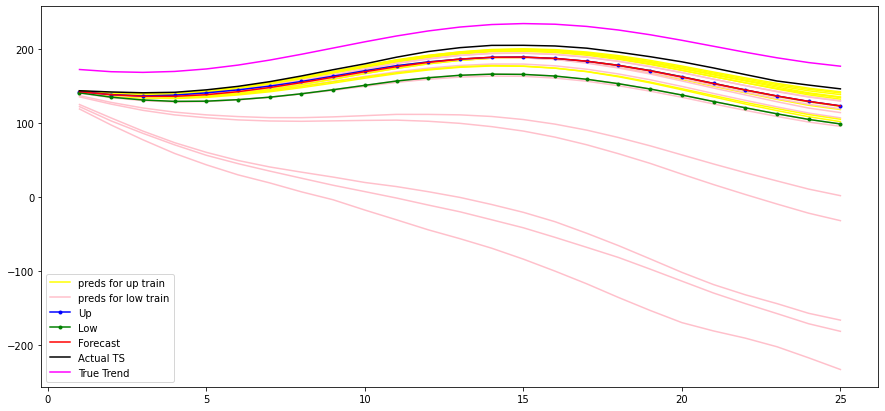

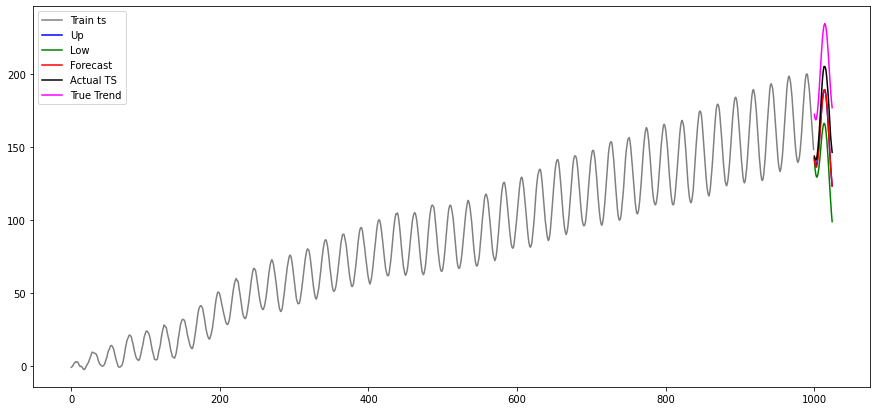

In [76]:
conf_int_plotting(up_predictions = x['up_predictions'],
                  low_predictions = x['low_predictions'],
                  regim='median',
                  plot_history = True,
                  plot_up_int = True,
                  plot_low_int = True,
                  plot_trend = True,
                  plot_forecast = True,
                  plot_upper_train = True,
                  plot_lower_train = True,
                  plot_ts_test = True)